In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/jovyan/20230406_ArticleClassifier/ArticleClassifier")
from src.general.utils import cc_path
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from src.visualization.visualize import visualize_individual_label_performance


In [2]:
labels = ['human', 'mouse', 'rat', 'nonhuman', 'controlled study',
       'animal experiment', 'animal tissue', 'animal model', 'animal cell',
       'major clinical study', 'clinical article', 'case report',
       'multicenter study', 'systematic review', 'meta analysis',
       'observational study', 'pilot study', 'longitudinal study',
       'retrospective study', 'case control study', 'cohort analysis',
       'cross-sectional study', 'diagnostic test accuracy study',
       'double blind procedure', 'crossover procedure',
       'single blind procedure', 'adult', 'aged', 'middle aged', 'child',
       'adolescent', 'young adult', 'very elderly', 'infant', 'school child',
       'newborn', 'preschool child', 'embryo', 'fetus', 'male', 'female',
       'human cell', 'human tissue', 'normal human', 'human experiment',
       'phase 2 clinical trial', 'randomized controlled trial',
       'clinical trial', 'controlled clinical trial', 'phase 3 clinical trial',
       'phase 1 clinical trial', 'phase 4 clinical trial']

In [38]:
def visualize_individual_label_performance(model_log):
    model_log = model_log.loc[(model_log['gnn_type'] == 'GAT') & \
                         (model_log['num_conv_layers'] == 1) & \
                         (model_log['embedding_size'] == 256) & \
                         (model_log['hidden_channels'] == 16) & \
                         (model_log['graph_num_epochs'] > 500) & \
                         (model_log['embedding_type'] == 'scibert') & \
                         (model_log['subsample_size'] == 56337) & \
                         (model_log['heads'] == 4), :]
    

    print(model_log[[    'num_samples', 'embedding_type', 'pretrain_epochs', 'graph_num_epochs', 'layers', 'heads', 'emb_size', 'edge_weight_threshold', 'dropout', 'scheduler', 'subsample_size', 'total_dataset_size', 'data_type_to_use', 'embedding_size', 'num_conv_layers', 'used_gnn', 'pretrain_lr', 'pretrain_weight_decay', 'pretrain_optimizer', 'pretrain_loss', 'graph_optimizer', 'graph_lr', 'graph_weight_decay', 'graph_loss']])
    print(model_log.columns.tolist())
    f1_labels = ['f1_' + label for label in labels]
    print(f1_labels)

    pivotted_log = model_log[f1_labels+['edge_weight_threshold']].pivot(columns='edge_weight_threshold')
    
    df = pivotted_log.copy()
    df.columns = ['-'.join([str(a) for a in col]) for col in df.columns]

    # Convert the DataFrame to long format for seaborn
    df = df.reset_index().melt(id_vars='index', var_name='label_threshold', value_name='score')

    # Split the combined column into separate label and threshold columns
    df['label'] = df['label_threshold'].apply(lambda x: x.split('-')[0] if '-' in x else x)
    df['threshold'] = df['label_threshold'].apply(lambda x: x.split('-')[1] if '-' in x else 'NaN')

    # Convert 'threshold' column to numeric, errors='coerce' will turn 'NaN' strings into actual NaNs
    df['threshold'] = pd.to_numeric(df['threshold'], errors='coerce')
    
    # # Plot the data
    # plt.figure(figsize=(20, 10))
    # sns.catplot(data=df, x='label', y='score', hue='threshold', kind='bar', height=5, aspect=3)
    # plt.xticks(rotation=90)
    # plt.title('Score by label and threshold')
    # plt.ylabel('Score')
    # plt.xlabel('Label')
    # plt.tight_layout()
    # plt.savefig(cc_path('reports/figures/bar_threshold_label_performance.png'))
    df.dropna(subset=['score', 'threshold'], inplace=True)
    
    
    for group_name, group in df.groupby('label'):
        print(group)
        group.plot(x='threshold', y='score')
        plt.title(f'Scores per threshold for: {group_name}')
        plt.show()
    
    print(df)


In [39]:
storage_file_path = 'model_log.csv'
model_results_df = pd.read_csv(cc_path(f'reports/model_results/{storage_file_path}'))

     num_samples embedding_type  pretrain_epochs  graph_num_epochs  layers  heads  emb_size  edge_weight_threshold  dropout  scheduler  subsample_size  total_dataset_size data_type_to_use  embedding_size  num_conv_layers  used_gnn  pretrain_lr  pretrain_weight_decay pretrain_optimizer pretrain_loss graph_optimizer  graph_lr  graph_weight_decay graph_loss
223          NaN        scibert              NaN              1000     NaN    4.0       NaN               0.017857      0.1        NaN         56337.0             56337.0      ['keyword']           256.0              1.0       NaN          NaN                    NaN                NaN           NaN            adam   0.00001              0.0001    BCELoss
224          NaN        scibert              NaN              1000     NaN    4.0       NaN               0.023256      0.1        NaN         56337.0             56337.0      ['keyword']           256.0              1.0       NaN          NaN                    NaN                NaN 

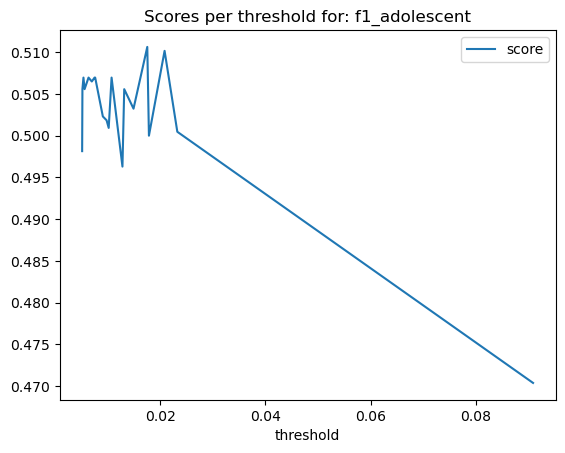

       index              label_threshold     score     label  threshold
10411    251  f1_adult-0.0051546391752577  0.833158  f1_adult   0.005155
10427    247  f1_adult-0.0052083333333333  0.837582  f1_adult   0.005208
10446    246  f1_adult-0.0054054054054054  0.837325  f1_adult   0.005405
10475    255  f1_adult-0.0056179775280898  0.837964  f1_adult   0.005618
10492    252  f1_adult-0.0063694267515923  0.837436  f1_adult   0.006369
10519    259  f1_adult-0.0069930069930069  0.836052  f1_adult   0.006993
10524    227  f1_adult-0.0075187969924812  0.837325  f1_adult   0.007519
10554    254  f1_adult-0.0076335877862595  0.837245  f1_adult   0.007634
10577    257   f1_adult-0.009090909090909  0.833397  f1_adult   0.009091
10588    248  f1_adult-0.0098039215686274  0.833158  f1_adult   0.009804
10616    256   f1_adult-0.010204081632653  0.840054  f1_adult   0.010204
10622    225   f1_adult-0.010752688172043  0.837325  f1_adult   0.010753
10643    226  f1_adult-0.0128205128205128  0.834432

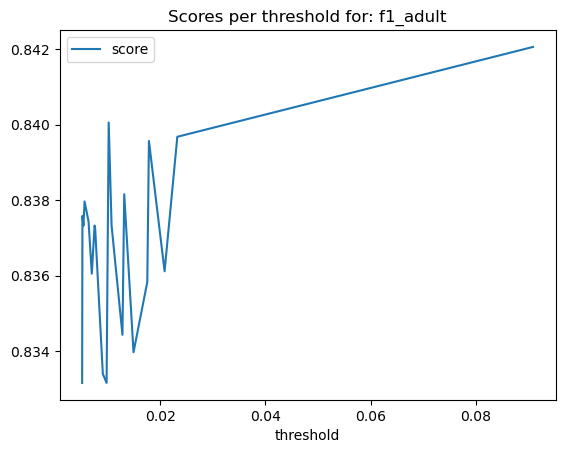

       index             label_threshold     score    label  threshold
10811    251  f1_aged-0.0051546391752577  0.662349  f1_aged   0.005155
10827    247  f1_aged-0.0052083333333333  0.665919  f1_aged   0.005208
10846    246  f1_aged-0.0054054054054054  0.663820  f1_aged   0.005405
10875    255  f1_aged-0.0056179775280898  0.665322  f1_aged   0.005618
10892    252  f1_aged-0.0063694267515923  0.666368  f1_aged   0.006369
10919    259  f1_aged-0.0069930069930069  0.666667  f1_aged   0.006993
10924    227  f1_aged-0.0075187969924812  0.663971  f1_aged   0.007519
10954    254  f1_aged-0.0076335877862595  0.665919  f1_aged   0.007634
10977    257   f1_aged-0.009090909090909  0.662637  f1_aged   0.009091
10988    248  f1_aged-0.0098039215686274  0.660862  f1_aged   0.009804
11016    256   f1_aged-0.010204081632653  0.664124  f1_aged   0.010204
11022    225   f1_aged-0.010752688172043  0.663969  f1_aged   0.010753
11043    226  f1_aged-0.0128205128205128  0.661446  f1_aged   0.012821
11078 

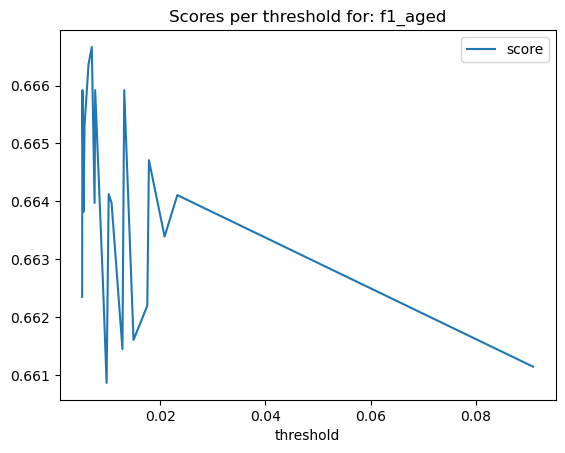

      index                    label_threshold     score           label  threshold
3211    251  f1_animal cell-0.0051546391752577  0.625672  f1_animal cell   0.005155
3227    247  f1_animal cell-0.0052083333333333  0.628399  f1_animal cell   0.005208
3246    246  f1_animal cell-0.0054054054054054  0.628399  f1_animal cell   0.005405
3275    255  f1_animal cell-0.0056179775280898  0.628019  f1_animal cell   0.005618
3292    252  f1_animal cell-0.0063694267515923  0.629227  f1_animal cell   0.006369
3319    259  f1_animal cell-0.0069930069930069  0.627851  f1_animal cell   0.006993
3324    227  f1_animal cell-0.0075187969924812  0.628399  f1_animal cell   0.007519
3354    254  f1_animal cell-0.0076335877862595  0.629227  f1_animal cell   0.007634
3377    257   f1_animal cell-0.009090909090909  0.624105  f1_animal cell   0.009091
3388    248  f1_animal cell-0.0098039215686274  0.627921  f1_animal cell   0.009804
3416    256   f1_animal cell-0.010204081632653  0.622871  f1_animal cell   0

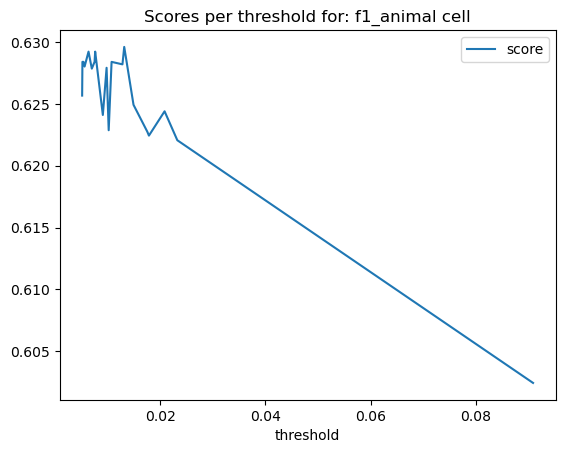

      index                          label_threshold     score                 label  threshold
2011    251  f1_animal experiment-0.0051546391752577  0.873215  f1_animal experiment   0.005155
2027    247  f1_animal experiment-0.0052083333333333  0.875962  f1_animal experiment   0.005208
2046    246  f1_animal experiment-0.0054054054054054  0.875036  f1_animal experiment   0.005405
2075    255  f1_animal experiment-0.0056179775280898  0.875285  f1_animal experiment   0.005618
2092    252  f1_animal experiment-0.0063694267515923  0.875285  f1_animal experiment   0.006369
2119    259  f1_animal experiment-0.0069930069930069  0.876142  f1_animal experiment   0.006993
2124    227  f1_animal experiment-0.0075187969924812  0.875036  f1_animal experiment   0.007519
2154    254  f1_animal experiment-0.0076335877862595  0.875036  f1_animal experiment   0.007634
2177    257   f1_animal experiment-0.009090909090909  0.874286  f1_animal experiment   0.009091
2188    248  f1_animal experiment-0.0098

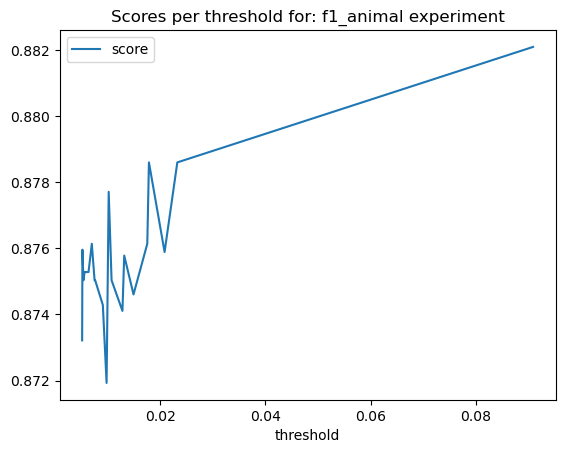

      index                     label_threshold     score            label  threshold
2811    251  f1_animal model-0.0051546391752577  0.826908  f1_animal model   0.005155
2827    247  f1_animal model-0.0052083333333333  0.829077  f1_animal model   0.005208
2846    246  f1_animal model-0.0054054054054054  0.827965  f1_animal model   0.005405
2875    255  f1_animal model-0.0056179775280898  0.828426  f1_animal model   0.005618
2892    252  f1_animal model-0.0063694267515923  0.828426  f1_animal model   0.006369
2919    259  f1_animal model-0.0069930069930069  0.826719  f1_animal model   0.006993
2924    227  f1_animal model-0.0075187969924812  0.827965  f1_animal model   0.007519
2954    254  f1_animal model-0.0076335877862595  0.828426  f1_animal model   0.007634
2977    257   f1_animal model-0.009090909090909  0.825847  f1_animal model   0.009091
2988    248  f1_animal model-0.0098039215686274  0.826908  f1_animal model   0.009804
3016    256   f1_animal model-0.010204081632653  0.831

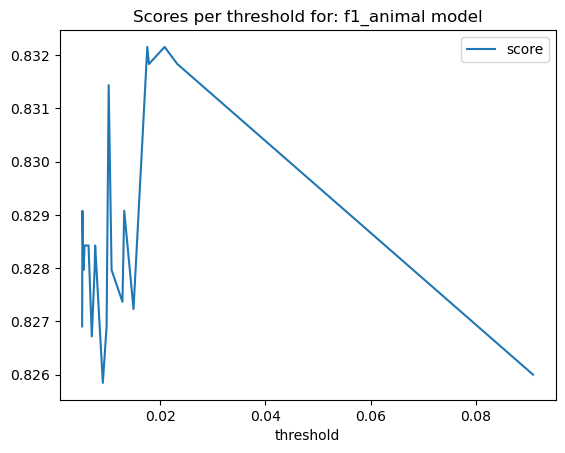

      index                      label_threshold     score             label  threshold
2411    251  f1_animal tissue-0.0051546391752577  0.765237  f1_animal tissue   0.005155
2427    247  f1_animal tissue-0.0052083333333333  0.770732  f1_animal tissue   0.005208
2446    246  f1_animal tissue-0.0054054054054054  0.769981  f1_animal tissue   0.005405
2475    255  f1_animal tissue-0.0056179775280898  0.770443  f1_animal tissue   0.005618
2492    252  f1_animal tissue-0.0063694267515923  0.770154  f1_animal tissue   0.006369
2519    259  f1_animal tissue-0.0069930069930069  0.770270  f1_animal tissue   0.006993
2524    227  f1_animal tissue-0.0075187969924812  0.769692  f1_animal tissue   0.007519
2554    254  f1_animal tissue-0.0076335877862595  0.770154  f1_animal tissue   0.007634
2577    257   f1_animal tissue-0.009090909090909  0.765237  f1_animal tissue   0.009091
2588    248  f1_animal tissue-0.0098039215686274  0.764883  f1_animal tissue   0.009804
2616    256   f1_animal tissue-0

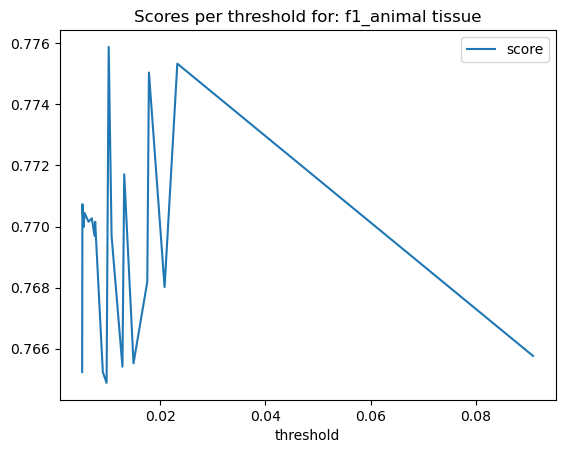

      index                           label_threshold     score                  label  threshold
7611    251  f1_case control study-0.0051546391752577  0.664596  f1_case control study   0.005155
7627    247  f1_case control study-0.0052083333333333  0.656151  f1_case control study   0.005208
7646    246  f1_case control study-0.0054054054054054  0.656151  f1_case control study   0.005405
7675    255  f1_case control study-0.0056179775280898  0.656151  f1_case control study   0.005618
7692    252  f1_case control study-0.0063694267515923  0.656151  f1_case control study   0.006369
7719    259  f1_case control study-0.0069930069930069  0.664577  f1_case control study   0.006993
7724    227  f1_case control study-0.0075187969924812  0.656151  f1_case control study   0.007519
7754    254  f1_case control study-0.0076335877862595  0.656151  f1_case control study   0.007634
7777    257   f1_case control study-0.009090909090909  0.666667  f1_case control study   0.009091
7788    248  f1_case

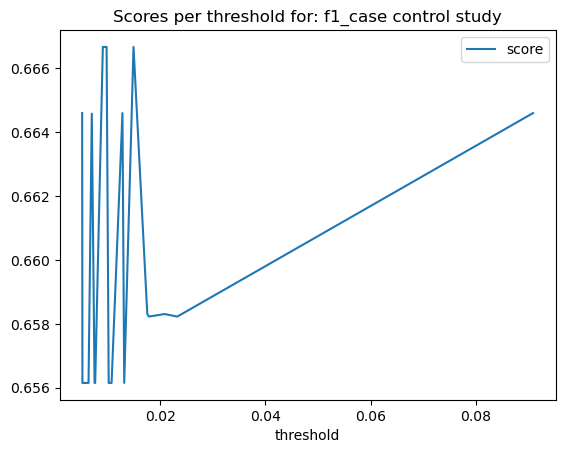

      index                    label_threshold     score           label  threshold
4411    251  f1_case report-0.0051546391752577  0.910569  f1_case report   0.005155
4427    247  f1_case report-0.0052083333333333  0.911635  f1_case report   0.005208
4446    246  f1_case report-0.0054054054054054  0.911635  f1_case report   0.005405
4475    255  f1_case report-0.0056179775280898  0.911635  f1_case report   0.005618
4492    252  f1_case report-0.0063694267515923  0.911635  f1_case report   0.006369
4519    259  f1_case report-0.0069930069930069  0.910833  f1_case report   0.006993
4524    227  f1_case report-0.0075187969924812  0.911635  f1_case report   0.007519
4554    254  f1_case report-0.0076335877862595  0.911635  f1_case report   0.007634
4577    257   f1_case report-0.009090909090909  0.909225  f1_case report   0.009091
4588    248  f1_case report-0.0098039215686274  0.910701  f1_case report   0.009804
4616    256   f1_case report-0.010204081632653  0.910833  f1_case report   0

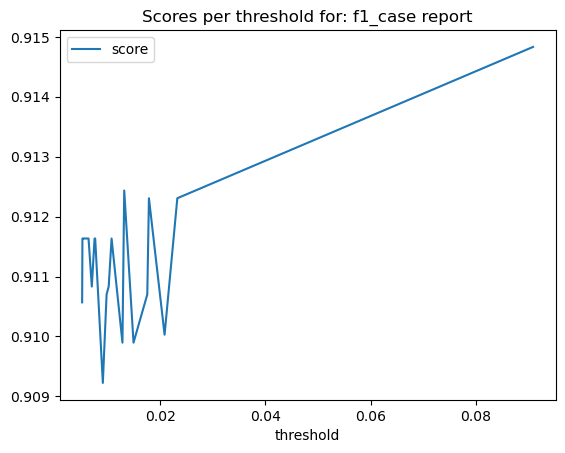

       index              label_threshold     score     label  threshold
11611    251  f1_child-0.0051546391752577  0.742817  f1_child   0.005155
11627    247  f1_child-0.0052083333333333  0.748768  f1_child   0.005208
11646    246  f1_child-0.0054054054054054  0.746479  f1_child   0.005405
11675    255  f1_child-0.0056179775280898  0.749296  f1_child   0.005618
11692    252  f1_child-0.0063694267515923  0.748768  f1_child   0.006369
11719    259  f1_child-0.0069930069930069  0.742616  f1_child   0.006993
11724    227  f1_child-0.0075187969924812  0.746479  f1_child   0.007519
11754    254  f1_child-0.0076335877862595  0.748768  f1_child   0.007634
11777    257   f1_child-0.009090909090909  0.746499  f1_child   0.009091
11788    248  f1_child-0.0098039215686274  0.744741  f1_child   0.009804
11816    256   f1_child-0.010204081632653  0.744120  f1_child   0.010204
11822    225   f1_child-0.010752688172043  0.746479  f1_child   0.010753
11843    226  f1_child-0.0128205128205128  0.743860

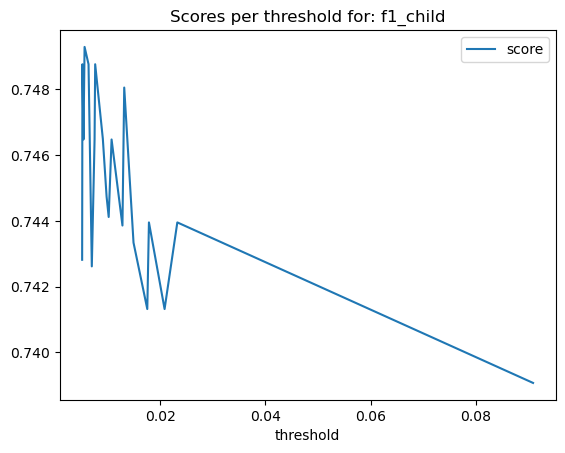

      index                         label_threshold     score                label  threshold
4011    251  f1_clinical article-0.0051546391752577  0.835106  f1_clinical article   0.005155
4027    247  f1_clinical article-0.0052083333333333  0.838985  f1_clinical article   0.005208
4046    246  f1_clinical article-0.0054054054054054  0.838761  f1_clinical article   0.005405
4075    255  f1_clinical article-0.0056179775280898  0.838141  f1_clinical article   0.005618
4092    252  f1_clinical article-0.0063694267515923  0.839071  f1_clinical article   0.006369
4119    259  f1_clinical article-0.0069930069930069  0.837557  f1_clinical article   0.006993
4124    227  f1_clinical article-0.0075187969924812  0.838761  f1_clinical article   0.007519
4154    254  f1_clinical article-0.0076335877862595  0.838847  f1_clinical article   0.007634
4177    257   f1_clinical article-0.009090909090909  0.836122  f1_clinical article   0.009091
4188    248  f1_clinical article-0.0098039215686274  0.83479

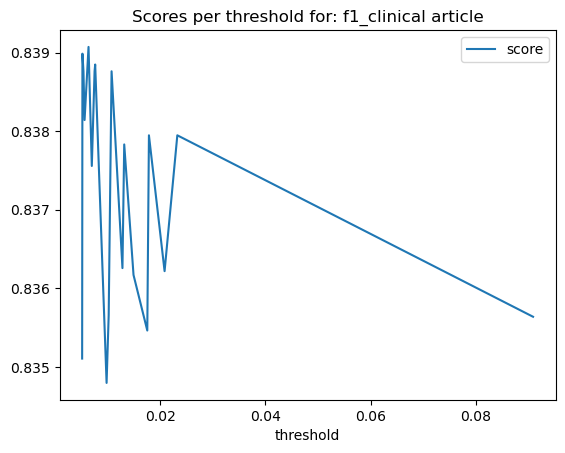

       index                       label_threshold     score              label  threshold
18811    251  f1_clinical trial-0.0051546391752577  0.490566  f1_clinical trial   0.005155
18827    247  f1_clinical trial-0.0052083333333333  0.494062  f1_clinical trial   0.005208
18846    246  f1_clinical trial-0.0054054054054054  0.492891  f1_clinical trial   0.005405
18875    255  f1_clinical trial-0.0056179775280898  0.492891  f1_clinical trial   0.005618
18892    252  f1_clinical trial-0.0063694267515923  0.492891  f1_clinical trial   0.006369
18919    259  f1_clinical trial-0.0069930069930069  0.497653  f1_clinical trial   0.006993
18924    227  f1_clinical trial-0.0075187969924812  0.492891  f1_clinical trial   0.007519
18954    254  f1_clinical trial-0.0076335877862595  0.492891  f1_clinical trial   0.007634
18977    257   f1_clinical trial-0.009090909090909  0.490566  f1_clinical trial   0.009091
18988    248  f1_clinical trial-0.0098039215686274  0.492891  f1_clinical trial   0.009804

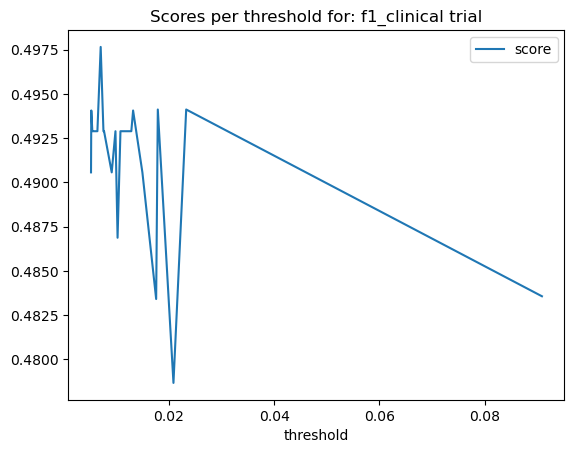

      index                        label_threshold     score               label  threshold
8011    251  f1_cohort analysis-0.0051546391752577  0.724981  f1_cohort analysis   0.005155
8027    247  f1_cohort analysis-0.0052083333333333  0.728253  f1_cohort analysis   0.005208
8046    246  f1_cohort analysis-0.0054054054054054  0.728950  f1_cohort analysis   0.005405
8075    255  f1_cohort analysis-0.0056179775280898  0.728742  f1_cohort analysis   0.005618
8092    252  f1_cohort analysis-0.0063694267515923  0.728950  f1_cohort analysis   0.006369
8119    259  f1_cohort analysis-0.0069930069930069  0.726506  f1_cohort analysis   0.006993
8124    227  f1_cohort analysis-0.0075187969924812  0.729439  f1_cohort analysis   0.007519
8154    254  f1_cohort analysis-0.0076335877862595  0.729439  f1_cohort analysis   0.007634
8177    257   f1_cohort analysis-0.009090909090909  0.723583  f1_cohort analysis   0.009091
8188    248  f1_cohort analysis-0.0098039215686274  0.721925  f1_cohort analysis

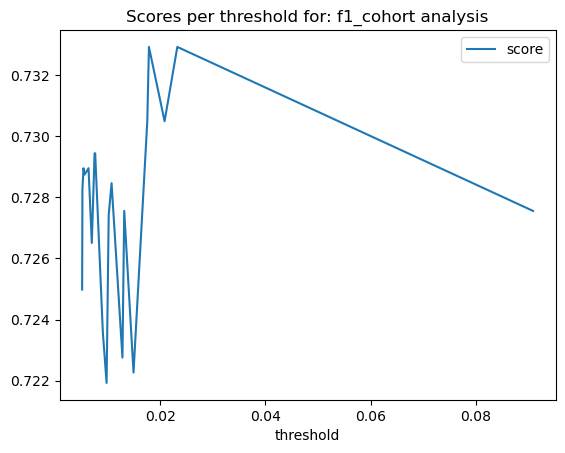

       index                                  label_threshold  score                         label  threshold
19211    251  f1_controlled clinical trial-0.0051546391752577    0.0  f1_controlled clinical trial   0.005155
19227    247  f1_controlled clinical trial-0.0052083333333333    0.0  f1_controlled clinical trial   0.005208
19246    246  f1_controlled clinical trial-0.0054054054054054    0.0  f1_controlled clinical trial   0.005405
19275    255  f1_controlled clinical trial-0.0056179775280898    0.0  f1_controlled clinical trial   0.005618
19292    252  f1_controlled clinical trial-0.0063694267515923    0.0  f1_controlled clinical trial   0.006369
19319    259  f1_controlled clinical trial-0.0069930069930069    0.0  f1_controlled clinical trial   0.006993
19324    227  f1_controlled clinical trial-0.0075187969924812    0.0  f1_controlled clinical trial   0.007519
19354    254  f1_controlled clinical trial-0.0076335877862595    0.0  f1_controlled clinical trial   0.007634
19377    2

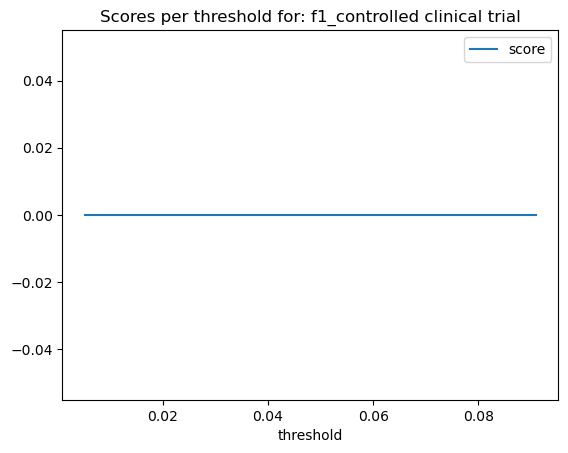

      index                         label_threshold     score                label  threshold
1611    251  f1_controlled study-0.0051546391752577  0.808418  f1_controlled study   0.005155
1627    247  f1_controlled study-0.0052083333333333  0.810951  f1_controlled study   0.005208
1646    246  f1_controlled study-0.0054054054054054  0.810364  f1_controlled study   0.005405
1675    255  f1_controlled study-0.0056179775280898  0.811008  f1_controlled study   0.005618
1692    252  f1_controlled study-0.0063694267515923  0.810284  f1_controlled study   0.006369
1719    259  f1_controlled study-0.0069930069930069  0.810075  f1_controlled study   0.006993
1724    227  f1_controlled study-0.0075187969924812  0.810224  f1_controlled study   0.007519
1754    254  f1_controlled study-0.0076335877862595  0.810368  f1_controlled study   0.007634
1777    257   f1_controlled study-0.009090909090909  0.808774  f1_controlled study   0.009091
1788    248  f1_controlled study-0.0098039215686274  0.80890

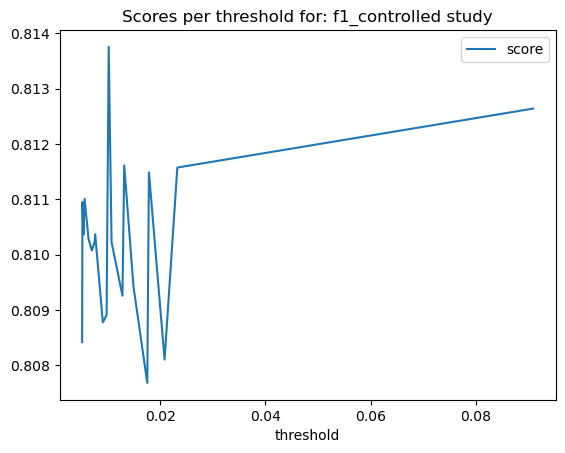

      index                            label_threshold     score                   label  threshold
9611    251  f1_crossover procedure-0.0051546391752577  0.631579  f1_crossover procedure   0.005155
9627    247  f1_crossover procedure-0.0052083333333333  0.607143  f1_crossover procedure   0.005208
9646    246  f1_crossover procedure-0.0054054054054054  0.607143  f1_crossover procedure   0.005405
9675    255  f1_crossover procedure-0.0056179775280898  0.607143  f1_crossover procedure   0.005618
9692    252  f1_crossover procedure-0.0063694267515923  0.607143  f1_crossover procedure   0.006369
9719    259  f1_crossover procedure-0.0069930069930069  0.607143  f1_crossover procedure   0.006993
9724    227  f1_crossover procedure-0.0075187969924812  0.607143  f1_crossover procedure   0.007519
9754    254  f1_crossover procedure-0.0076335877862595  0.607143  f1_crossover procedure   0.007634
9777    257   f1_crossover procedure-0.009090909090909  0.631579  f1_crossover procedure   0.009091


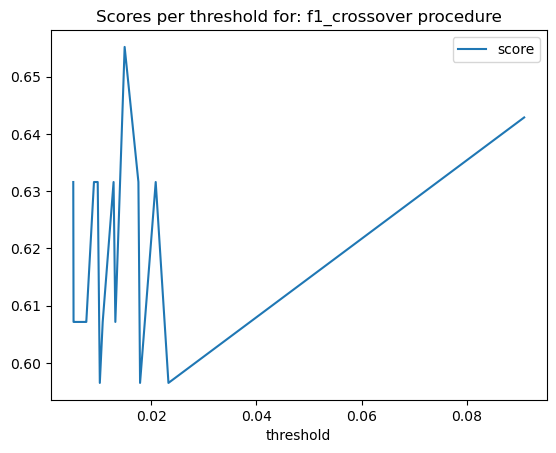

      index                                    label_threshold     score                              label  threshold
8811    251  f1_diagnostic test accuracy study-0.0051546391...  0.485577  f1_diagnostic test accuracy study   0.005155
8827    247  f1_diagnostic test accuracy study-0.0052083333...  0.492611  f1_diagnostic test accuracy study   0.005208
8846    246  f1_diagnostic test accuracy study-0.0054054054...  0.488889  f1_diagnostic test accuracy study   0.005405
8875    255  f1_diagnostic test accuracy study-0.0056179775...  0.492611  f1_diagnostic test accuracy study   0.005618
8892    252  f1_diagnostic test accuracy study-0.0063694267...  0.488889  f1_diagnostic test accuracy study   0.006369
8919    259  f1_diagnostic test accuracy study-0.0069930069...  0.488998  f1_diagnostic test accuracy study   0.006993
8924    227  f1_diagnostic test accuracy study-0.0075187969...  0.488889  f1_diagnostic test accuracy study   0.007519
8954    254  f1_diagnostic test accuracy study-0

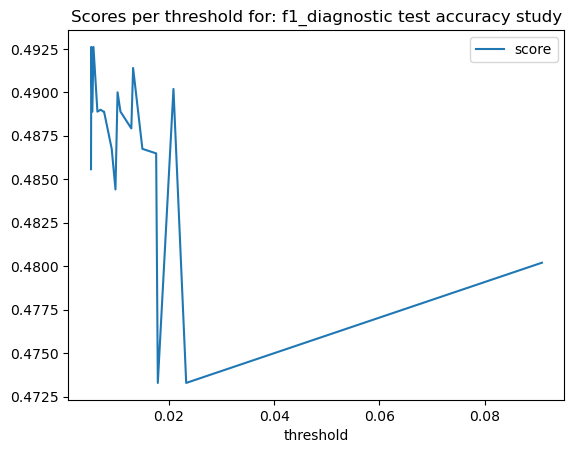

      index                               label_threshold     score                      label  threshold
9211    251  f1_double blind procedure-0.0051546391752577  0.754098  f1_double blind procedure   0.005155
9227    247  f1_double blind procedure-0.0052083333333333  0.732240  f1_double blind procedure   0.005208
9246    246  f1_double blind procedure-0.0054054054054054  0.736264  f1_double blind procedure   0.005405
9275    255  f1_double blind procedure-0.0056179775280898  0.732240  f1_double blind procedure   0.005618
9292    252  f1_double blind procedure-0.0063694267515923  0.736264  f1_double blind procedure   0.006369
9319    259  f1_double blind procedure-0.0069930069930069  0.747253  f1_double blind procedure   0.006993
9324    227  f1_double blind procedure-0.0075187969924812  0.736264  f1_double blind procedure   0.007519
9354    254  f1_double blind procedure-0.0076335877862595  0.736264  f1_double blind procedure   0.007634
9377    257   f1_double blind procedure-0.0090

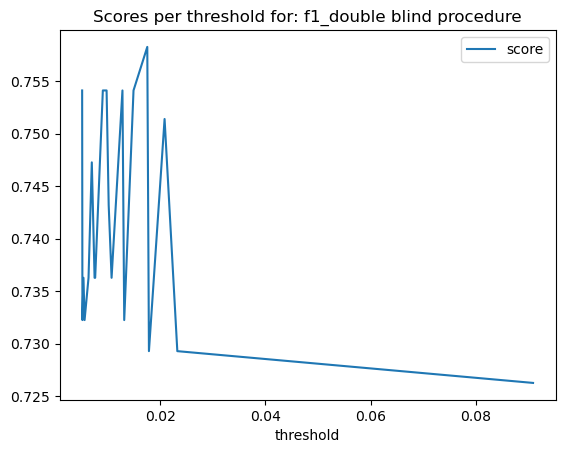

       index               label_threshold     score      label  threshold
14811    251  f1_embryo-0.0051546391752577  0.407960  f1_embryo   0.005155
14827    247  f1_embryo-0.0052083333333333  0.421569  f1_embryo   0.005208
14846    246  f1_embryo-0.0054054054054054  0.419512  f1_embryo   0.005405
14875    255  f1_embryo-0.0056179775280898  0.421569  f1_embryo   0.005618
14892    252  f1_embryo-0.0063694267515923  0.419512  f1_embryo   0.006369
14919    259  f1_embryo-0.0069930069930069  0.417476  f1_embryo   0.006993
14924    227  f1_embryo-0.0075187969924812  0.419512  f1_embryo   0.007519
14954    254  f1_embryo-0.0076335877862595  0.419512  f1_embryo   0.007634
14977    257   f1_embryo-0.009090909090909  0.407960  f1_embryo   0.009091
14988    248  f1_embryo-0.0098039215686274  0.407960  f1_embryo   0.009804
15016    256   f1_embryo-0.010204081632653  0.385787  f1_embryo   0.010204
15022    225   f1_embryo-0.010752688172043  0.419512  f1_embryo   0.010753
15043    226  f1_embryo-0

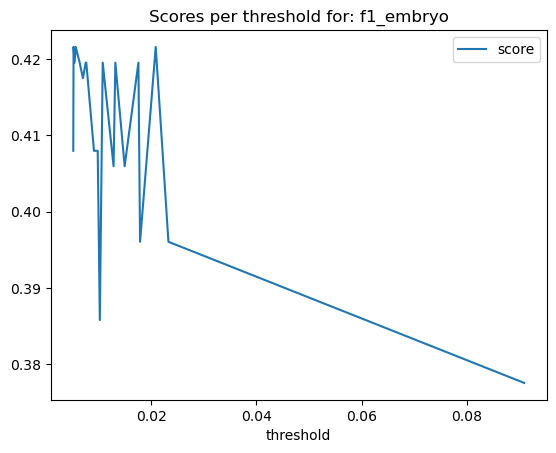

       index               label_threshold     score      label  threshold
16011    251  f1_female-0.0051546391752577  0.880622  f1_female   0.005155
16027    247  f1_female-0.0052083333333333  0.883065  f1_female   0.005208
16046    246  f1_female-0.0054054054054054  0.882996  f1_female   0.005405
16075    255  f1_female-0.0056179775280898  0.882953  f1_female   0.005618
16092    252  f1_female-0.0063694267515923  0.882943  f1_female   0.006369
16119    259  f1_female-0.0069930069930069  0.882713  f1_female   0.006993
16124    227  f1_female-0.0075187969924812  0.883143  f1_female   0.007519
16154    254  f1_female-0.0076335877862595  0.882943  f1_female   0.007634
16177    257   f1_female-0.009090909090909  0.881238  f1_female   0.009091
16188    248  f1_female-0.0098039215686274  0.880874  f1_female   0.009804
16216    256   f1_female-0.010204081632653  0.884135  f1_female   0.010204
16222    225   f1_female-0.010752688172043  0.883070  f1_female   0.010753
16243    226  f1_female-0

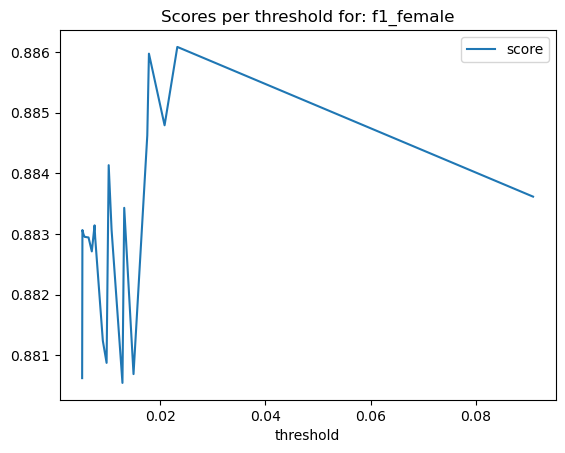

       index              label_threshold     score     label  threshold
15211    251  f1_fetus-0.0051546391752577  0.457831  f1_fetus   0.005155
15227    247  f1_fetus-0.0052083333333333  0.400000  f1_fetus   0.005208
15246    246  f1_fetus-0.0054054054054054  0.400000  f1_fetus   0.005405
15275    255  f1_fetus-0.0056179775280898  0.400000  f1_fetus   0.005618
15292    252  f1_fetus-0.0063694267515923  0.400000  f1_fetus   0.006369
15319    259  f1_fetus-0.0069930069930069  0.419753  f1_fetus   0.006993
15324    227  f1_fetus-0.0075187969924812  0.400000  f1_fetus   0.007519
15354    254  f1_fetus-0.0076335877862595  0.400000  f1_fetus   0.007634
15377    257   f1_fetus-0.009090909090909  0.476190  f1_fetus   0.009091
15388    248  f1_fetus-0.0098039215686274  0.457831  f1_fetus   0.009804
15416    256   f1_fetus-0.010204081632653  0.342105  f1_fetus   0.010204
15422    225   f1_fetus-0.010752688172043  0.400000  f1_fetus   0.010753
15443    226  f1_fetus-0.0128205128205128  0.457831

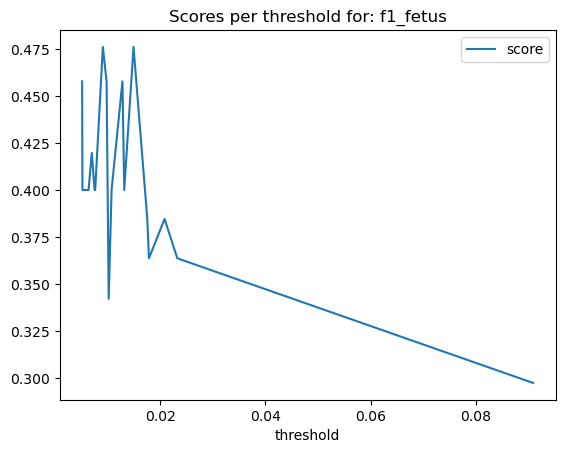

     index              label_threshold     score     label  threshold
11     251  f1_human-0.0051546391752577  0.966207  f1_human   0.005155
27     247  f1_human-0.0052083333333333  0.965404  f1_human   0.005208
46     246  f1_human-0.0054054054054054  0.965526  f1_human   0.005405
75     255  f1_human-0.0056179775280898  0.965467  f1_human   0.005618
92     252  f1_human-0.0063694267515923  0.965589  f1_human   0.006369
119    259  f1_human-0.0069930069930069  0.965643  f1_human   0.006993
124    227  f1_human-0.0075187969924812  0.965526  f1_human   0.007519
154    254  f1_human-0.0076335877862595  0.965648  f1_human   0.007634
177    257   f1_human-0.009090909090909  0.966030  f1_human   0.009091
188    248  f1_human-0.0098039215686274  0.965955  f1_human   0.009804
216    256   f1_human-0.010204081632653  0.965757  f1_human   0.010204
222    225   f1_human-0.010752688172043  0.965526  f1_human   0.010753
243    226  f1_human-0.0128205128205128  0.966152  f1_human   0.012821
278   

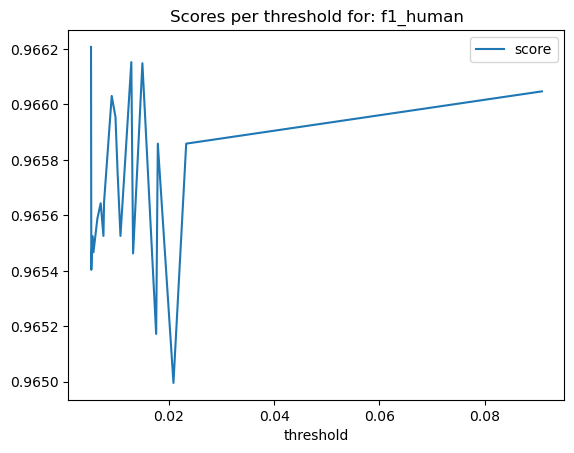

       index                   label_threshold     score          label  threshold
16411    251  f1_human cell-0.0051546391752577  0.742714  f1_human cell   0.005155
16427    247  f1_human cell-0.0052083333333333  0.742044  f1_human cell   0.005208
16446    246  f1_human cell-0.0054054054054054  0.743000  f1_human cell   0.005405
16475    255  f1_human cell-0.0056179775280898  0.741423  f1_human cell   0.005618
16492    252  f1_human cell-0.0063694267515923  0.742690  f1_human cell   0.006369
16519    259  f1_human cell-0.0069930069930069  0.742070  f1_human cell   0.006993
16524    227  f1_human cell-0.0075187969924812  0.743000  f1_human cell   0.007519
16554    254  f1_human cell-0.0076335877862595  0.742690  f1_human cell   0.007634
16577    257   f1_human cell-0.009090909090909  0.743119  f1_human cell   0.009091
16588    248  f1_human cell-0.0098039215686274  0.743451  f1_human cell   0.009804
16616    256   f1_human cell-0.010204081632653  0.739241  f1_human cell   0.010204
1662

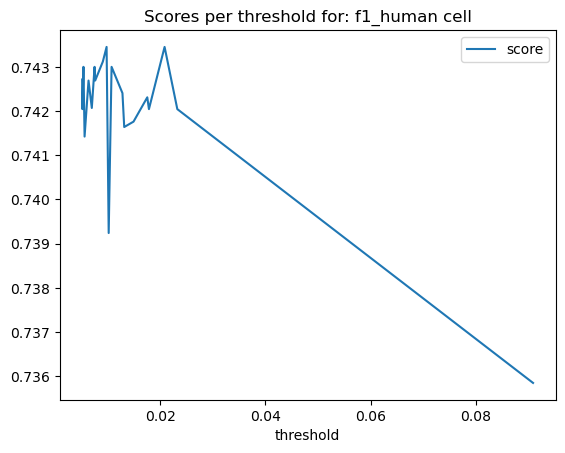

       index                         label_threshold     score                label  threshold
17611    251  f1_human experiment-0.0051546391752577  0.362903  f1_human experiment   0.005155
17627    247  f1_human experiment-0.0052083333333333  0.367347  f1_human experiment   0.005208
17646    246  f1_human experiment-0.0054054054054054  0.367347  f1_human experiment   0.005405
17675    255  f1_human experiment-0.0056179775280898  0.367347  f1_human experiment   0.005618
17692    252  f1_human experiment-0.0063694267515923  0.367347  f1_human experiment   0.006369
17719    259  f1_human experiment-0.0069930069930069  0.364372  f1_human experiment   0.006993
17724    227  f1_human experiment-0.0075187969924812  0.367347  f1_human experiment   0.007519
17754    254  f1_human experiment-0.0076335877862595  0.367347  f1_human experiment   0.007634
17777    257   f1_human experiment-0.009090909090909  0.356275  f1_human experiment   0.009091
17788    248  f1_human experiment-0.00980392156862

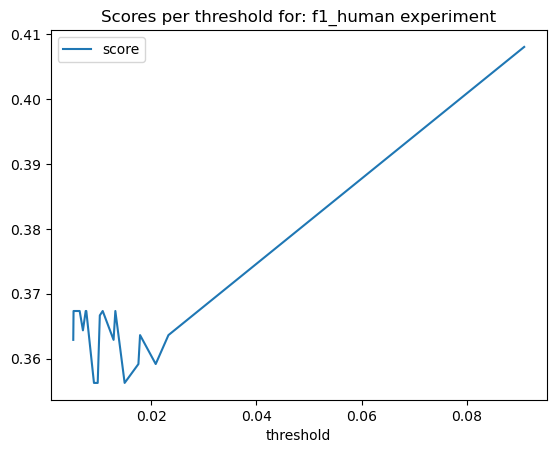

       index                     label_threshold     score            label  threshold
16811    251  f1_human tissue-0.0051546391752577  0.627490  f1_human tissue   0.005155
16827    247  f1_human tissue-0.0052083333333333  0.623166  f1_human tissue   0.005208
16846    246  f1_human tissue-0.0054054054054054  0.622470  f1_human tissue   0.005405
16875    255  f1_human tissue-0.0056179775280898  0.623862  f1_human tissue   0.005618
16892    252  f1_human tissue-0.0063694267515923  0.622851  f1_human tissue   0.006369
16919    259  f1_human tissue-0.0069930069930069  0.622736  f1_human tissue   0.006993
16924    227  f1_human tissue-0.0075187969924812  0.622470  f1_human tissue   0.007519
16954    254  f1_human tissue-0.0076335877862595  0.622155  f1_human tissue   0.007634
16977    257   f1_human tissue-0.009090909090909  0.626494  f1_human tissue   0.009091
16988    248  f1_human tissue-0.0098039215686274  0.628173  f1_human tissue   0.009804
17016    256   f1_human tissue-0.0102040816

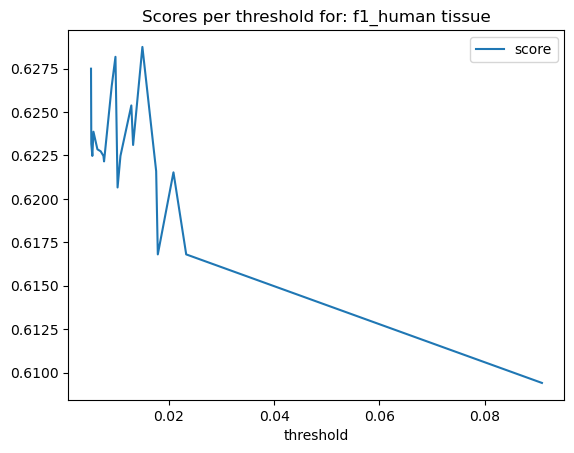

       index               label_threshold     score      label  threshold
13211    251  f1_infant-0.0051546391752577  0.434146  f1_infant   0.005155
13227    247  f1_infant-0.0052083333333333  0.426471  f1_infant   0.005208
13246    246  f1_infant-0.0054054054054054  0.422604  f1_infant   0.005405
13275    255  f1_infant-0.0056179775280898  0.427518  f1_infant   0.005618
13292    252  f1_infant-0.0063694267515923  0.414815  f1_infant   0.006369
13319    259  f1_infant-0.0069930069930069  0.427184  f1_infant   0.006993
13324    227  f1_infant-0.0075187969924812  0.422604  f1_infant   0.007519
13354    254  f1_infant-0.0076335877862595  0.414815  f1_infant   0.007634
13377    257   f1_infant-0.009090909090909  0.430318  f1_infant   0.009091
13388    248  f1_infant-0.0098039215686274  0.435208  f1_infant   0.009804
13416    256   f1_infant-0.010204081632653  0.418136  f1_infant   0.010204
13422    225   f1_infant-0.010752688172043  0.422604  f1_infant   0.010753
13443    226  f1_infant-0

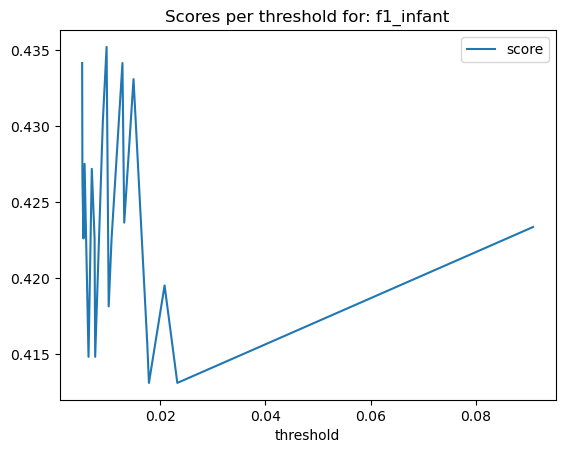

      index                           label_threshold     score                  label  threshold
6811    251  f1_longitudinal study-0.0051546391752577  0.583051  f1_longitudinal study   0.005155
6827    247  f1_longitudinal study-0.0052083333333333  0.581081  f1_longitudinal study   0.005208
6846    246  f1_longitudinal study-0.0054054054054054  0.581081  f1_longitudinal study   0.005405
6875    255  f1_longitudinal study-0.0056179775280898  0.581081  f1_longitudinal study   0.005618
6892    252  f1_longitudinal study-0.0063694267515923  0.581081  f1_longitudinal study   0.006369
6919    259  f1_longitudinal study-0.0069930069930069  0.581081  f1_longitudinal study   0.006993
6924    227  f1_longitudinal study-0.0075187969924812  0.581081  f1_longitudinal study   0.007519
6954    254  f1_longitudinal study-0.0076335877862595  0.581081  f1_longitudinal study   0.007634
6977    257   f1_longitudinal study-0.009090909090909  0.583051  f1_longitudinal study   0.009091
6988    248  f1_long

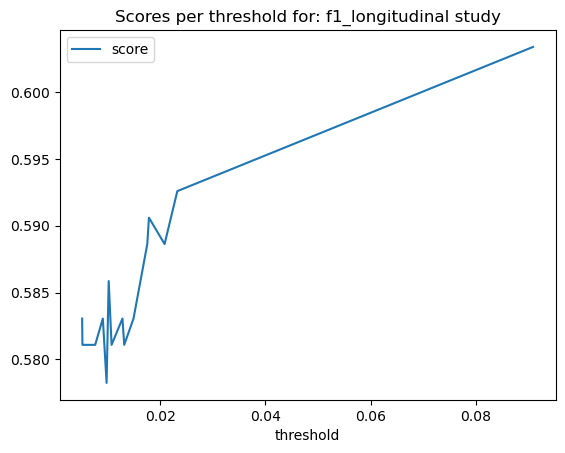

      index                             label_threshold     score                    label  threshold
3611    251  f1_major clinical study-0.0051546391752577  0.879510  f1_major clinical study   0.005155
3627    247  f1_major clinical study-0.0052083333333333  0.883656  f1_major clinical study   0.005208
3646    246  f1_major clinical study-0.0054054054054054  0.883157  f1_major clinical study   0.005405
3675    255  f1_major clinical study-0.0056179775280898  0.883656  f1_major clinical study   0.005618
3692    252  f1_major clinical study-0.0063694267515923  0.883280  f1_major clinical study   0.006369
3719    259  f1_major clinical study-0.0069930069930069  0.880946  f1_major clinical study   0.006993
3724    227  f1_major clinical study-0.0075187969924812  0.883157  f1_major clinical study   0.007519
3754    254  f1_major clinical study-0.0076335877862595  0.883280  f1_major clinical study   0.007634
3777    257   f1_major clinical study-0.009090909090909  0.878986  f1_major clinic

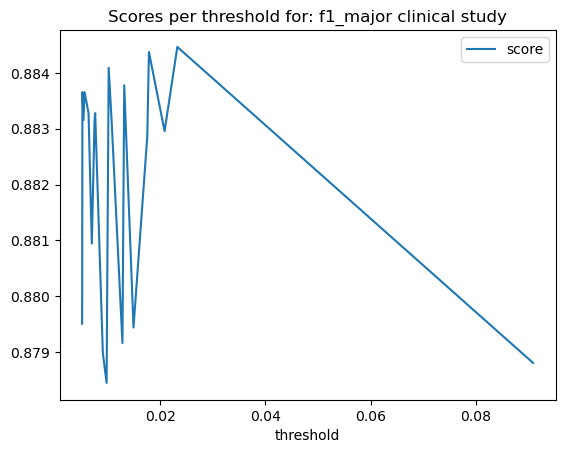

       index             label_threshold     score    label  threshold
15611    251  f1_male-0.0051546391752577  0.885675  f1_male   0.005155
15627    247  f1_male-0.0052083333333333  0.891592  f1_male   0.005208
15646    246  f1_male-0.0054054054054054  0.891576  f1_male   0.005405
15675    255  f1_male-0.0056179775280898  0.891610  f1_male   0.005618
15692    252  f1_male-0.0063694267515923  0.891702  f1_male   0.006369
15719    259  f1_male-0.0069930069930069  0.890758  f1_male   0.006993
15724    227  f1_male-0.0075187969924812  0.891486  f1_male   0.007519
15754    254  f1_male-0.0076335877862595  0.891539  f1_male   0.007634
15777    257   f1_male-0.009090909090909  0.886310  f1_male   0.009091
15788    248  f1_male-0.0098039215686274  0.885597  f1_male   0.009804
15816    256   f1_male-0.010204081632653  0.893753  f1_male   0.010204
15822    225   f1_male-0.010752688172043  0.891667  f1_male   0.010753
15843    226  f1_male-0.0128205128205128  0.885964  f1_male   0.012821
15878 

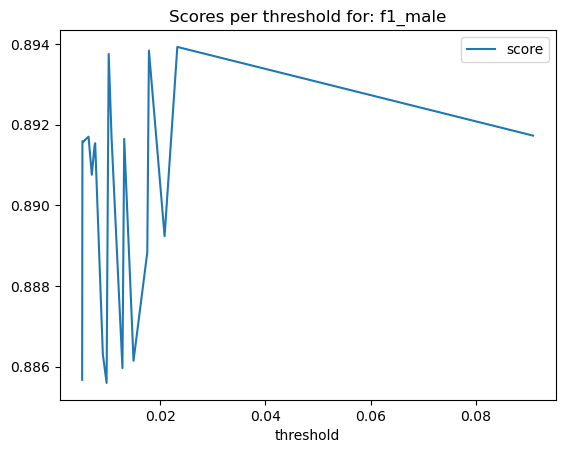

      index                      label_threshold     score             label  threshold
5611    251  f1_meta analysis-0.0051546391752577  0.797153  f1_meta analysis   0.005155
5627    247  f1_meta analysis-0.0052083333333333  0.804270  f1_meta analysis   0.005208
5646    246  f1_meta analysis-0.0054054054054054  0.801418  f1_meta analysis   0.005405
5675    255  f1_meta analysis-0.0056179775280898  0.804270  f1_meta analysis   0.005618
5692    252  f1_meta analysis-0.0063694267515923  0.801418  f1_meta analysis   0.006369
5719    259  f1_meta analysis-0.0069930069930069  0.809859  f1_meta analysis   0.006993
5724    227  f1_meta analysis-0.0075187969924812  0.801418  f1_meta analysis   0.007519
5754    254  f1_meta analysis-0.0076335877862595  0.801418  f1_meta analysis   0.007634
5777    257   f1_meta analysis-0.009090909090909  0.805654  f1_meta analysis   0.009091
5788    248  f1_meta analysis-0.0098039215686274  0.801418  f1_meta analysis   0.009804
5816    256   f1_meta analysis-0

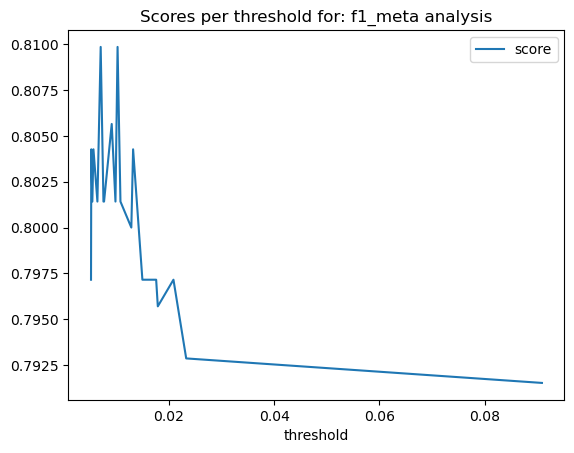

       index                    label_threshold     score           label  threshold
11211    251  f1_middle aged-0.0051546391752577  0.289798  f1_middle aged   0.005155
11227    247  f1_middle aged-0.0052083333333333  0.268116  f1_middle aged   0.005208
11246    246  f1_middle aged-0.0054054054054054  0.274268  f1_middle aged   0.005405
11275    255  f1_middle aged-0.0056179775280898  0.272305  f1_middle aged   0.005618
11292    252  f1_middle aged-0.0063694267515923  0.276781  f1_middle aged   0.006369
11319    259  f1_middle aged-0.0069930069930069  0.279070  f1_middle aged   0.006993
11324    227  f1_middle aged-0.0075187969924812  0.274268  f1_middle aged   0.007519
11354    254  f1_middle aged-0.0076335877862595  0.276781  f1_middle aged   0.007634
11377    257   f1_middle aged-0.009090909090909  0.290227  f1_middle aged   0.009091
11388    248  f1_middle aged-0.0098039215686274  0.283877  f1_middle aged   0.009804
11416    256   f1_middle aged-0.010204081632653  0.249053  f1_mid

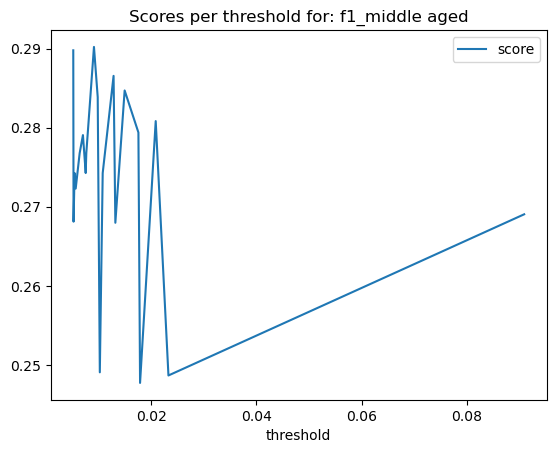

     index              label_threshold     score     label  threshold
411    251  f1_mouse-0.0051546391752577  0.881324  f1_mouse   0.005155
427    247  f1_mouse-0.0052083333333333  0.883325  f1_mouse   0.005208
446    246  f1_mouse-0.0054054054054054  0.882798  f1_mouse   0.005405
475    255  f1_mouse-0.0056179775280898  0.883325  f1_mouse   0.005618
492    252  f1_mouse-0.0063694267515923  0.882798  f1_mouse   0.006369
519    259  f1_mouse-0.0069930069930069  0.884688  f1_mouse   0.006993
524    227  f1_mouse-0.0075187969924812  0.882798  f1_mouse   0.007519
554    254  f1_mouse-0.0076335877862595  0.882798  f1_mouse   0.007634
577    257   f1_mouse-0.009090909090909  0.881964  f1_mouse   0.009091
588    248  f1_mouse-0.0098039215686274  0.879962  f1_mouse   0.009804
616    256   f1_mouse-0.010204081632653  0.881935  f1_mouse   0.010204
622    225   f1_mouse-0.010752688172043  0.882798  f1_mouse   0.010753
643    226  f1_mouse-0.0128205128205128  0.881020  f1_mouse   0.012821
678   

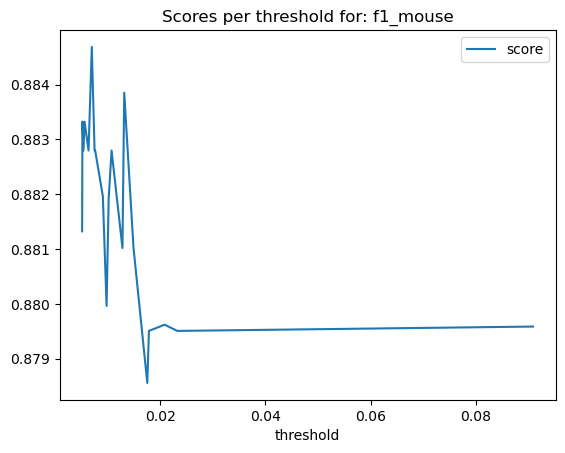

      index                          label_threshold     score                 label  threshold
4811    251  f1_multicenter study-0.0051546391752577  0.454308  f1_multicenter study   0.005155
4827    247  f1_multicenter study-0.0052083333333333  0.464380  f1_multicenter study   0.005208
4846    246  f1_multicenter study-0.0054054054054054  0.459103  f1_multicenter study   0.005405
4875    255  f1_multicenter study-0.0056179775280898  0.468421  f1_multicenter study   0.005618
4892    252  f1_multicenter study-0.0063694267515923  0.459103  f1_multicenter study   0.006369
4919    259  f1_multicenter study-0.0069930069930069  0.459530  f1_multicenter study   0.006993
4924    227  f1_multicenter study-0.0075187969924812  0.459103  f1_multicenter study   0.007519
4954    254  f1_multicenter study-0.0076335877862595  0.459103  f1_multicenter study   0.007634
4977    257   f1_multicenter study-0.009090909090909  0.454308  f1_multicenter study   0.009091
4988    248  f1_multicenter study-0.0098

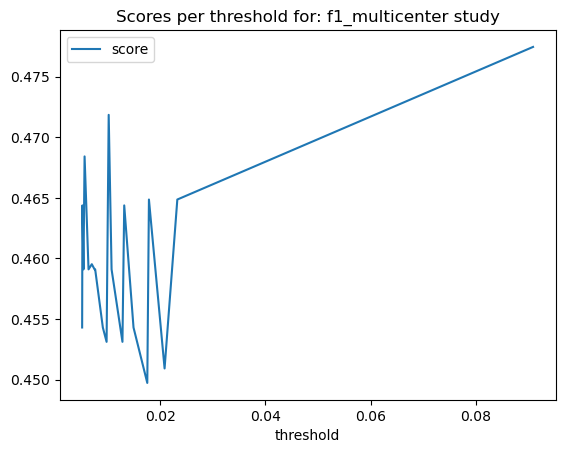

       index                label_threshold     score       label  threshold
14011    251  f1_newborn-0.0051546391752577  0.449367  f1_newborn   0.005155
14027    247  f1_newborn-0.0052083333333333  0.447950  f1_newborn   0.005208
14046    246  f1_newborn-0.0054054054054054  0.447950  f1_newborn   0.005405
14075    255  f1_newborn-0.0056179775280898  0.447950  f1_newborn   0.005618
14092    252  f1_newborn-0.0063694267515923  0.450794  f1_newborn   0.006369
14119    259  f1_newborn-0.0069930069930069  0.455696  f1_newborn   0.006993
14124    227  f1_newborn-0.0075187969924812  0.447950  f1_newborn   0.007519
14154    254  f1_newborn-0.0076335877862595  0.450794  f1_newborn   0.007634
14177    257   f1_newborn-0.009090909090909  0.450794  f1_newborn   0.009091
14188    248  f1_newborn-0.0098039215686274  0.449367  f1_newborn   0.009804
14216    256   f1_newborn-0.010204081632653  0.435897  f1_newborn   0.010204
14222    225   f1_newborn-0.010752688172043  0.447950  f1_newborn   0.010753

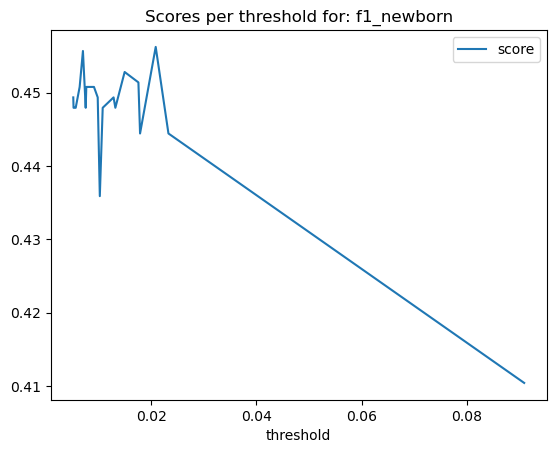

      index                 label_threshold     score        label  threshold
1211    251  f1_nonhuman-0.0051546391752577  0.899716  f1_nonhuman   0.005155
1227    247  f1_nonhuman-0.0052083333333333  0.902184  f1_nonhuman   0.005208
1246    246  f1_nonhuman-0.0054054054054054  0.902078  f1_nonhuman   0.005405
1275    255  f1_nonhuman-0.0056179775280898  0.902319  f1_nonhuman   0.005618
1292    252  f1_nonhuman-0.0063694267515923  0.902289  f1_nonhuman   0.006369
1319    259  f1_nonhuman-0.0069930069930069  0.901885  f1_nonhuman   0.006993
1324    227  f1_nonhuman-0.0075187969924812  0.902078  f1_nonhuman   0.007519
1354    254  f1_nonhuman-0.0076335877862595  0.902154  f1_nonhuman   0.007634
1377    257   f1_nonhuman-0.009090909090909  0.899880  f1_nonhuman   0.009091
1388    248  f1_nonhuman-0.0098039215686274  0.900120  f1_nonhuman   0.009804
1416    256   f1_nonhuman-0.010204081632653  0.899655  f1_nonhuman   0.010204
1422    225   f1_nonhuman-0.010752688172043  0.901914  f1_nonhum

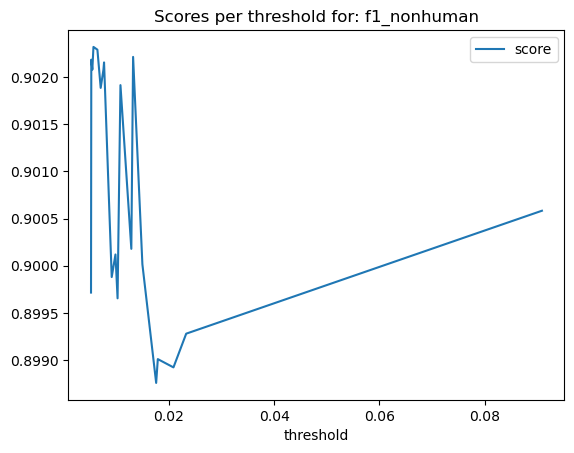

       index                     label_threshold     score            label  threshold
17211    251  f1_normal human-0.0051546391752577  0.507692  f1_normal human   0.005155
17227    247  f1_normal human-0.0052083333333333  0.492188  f1_normal human   0.005208
17246    246  f1_normal human-0.0054054054054054  0.492188  f1_normal human   0.005405
17275    255  f1_normal human-0.0056179775280898  0.492188  f1_normal human   0.005618
17292    252  f1_normal human-0.0063694267515923  0.492188  f1_normal human   0.006369
17319    259  f1_normal human-0.0069930069930069  0.496124  f1_normal human   0.006993
17324    227  f1_normal human-0.0075187969924812  0.492188  f1_normal human   0.007519
17354    254  f1_normal human-0.0076335877862595  0.492188  f1_normal human   0.007634
17377    257   f1_normal human-0.009090909090909  0.509653  f1_normal human   0.009091
17388    248  f1_normal human-0.0098039215686274  0.509653  f1_normal human   0.009804
17416    256   f1_normal human-0.0102040816

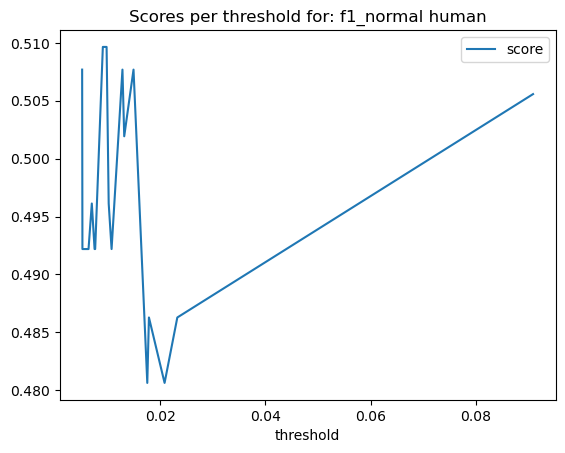

      index                            label_threshold     score                   label  threshold
6011    251  f1_observational study-0.0051546391752577  0.637419  f1_observational study   0.005155
6027    247  f1_observational study-0.0052083333333333  0.639175  f1_observational study   0.005208
6046    246  f1_observational study-0.0054054054054054  0.637419  f1_observational study   0.005405
6075    255  f1_observational study-0.0056179775280898  0.639175  f1_observational study   0.005618
6092    252  f1_observational study-0.0063694267515923  0.637419  f1_observational study   0.006369
6119    259  f1_observational study-0.0069930069930069  0.641849  f1_observational study   0.006993
6124    227  f1_observational study-0.0075187969924812  0.637419  f1_observational study   0.007519
6154    254  f1_observational study-0.0076335877862595  0.637419  f1_observational study   0.007634
6177    257   f1_observational study-0.009090909090909  0.640927  f1_observational study   0.009091


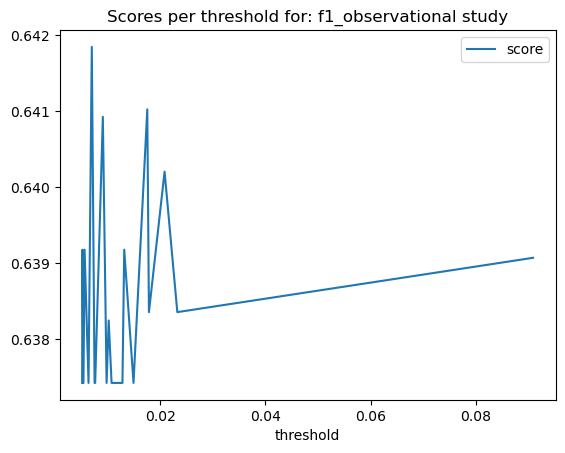

       index                               label_threshold     score                      label  threshold
20011    251  f1_phase 1 clinical trial-0.0051546391752577  0.275862  f1_phase 1 clinical trial   0.005155
20027    247  f1_phase 1 clinical trial-0.0052083333333333  0.275862  f1_phase 1 clinical trial   0.005208
20046    246  f1_phase 1 clinical trial-0.0054054054054054  0.275862  f1_phase 1 clinical trial   0.005405
20075    255  f1_phase 1 clinical trial-0.0056179775280898  0.275862  f1_phase 1 clinical trial   0.005618
20092    252  f1_phase 1 clinical trial-0.0063694267515923  0.275862  f1_phase 1 clinical trial   0.006369
20119    259  f1_phase 1 clinical trial-0.0069930069930069  0.275862  f1_phase 1 clinical trial   0.006993
20124    227  f1_phase 1 clinical trial-0.0075187969924812  0.275862  f1_phase 1 clinical trial   0.007519
20154    254  f1_phase 1 clinical trial-0.0076335877862595  0.275862  f1_phase 1 clinical trial   0.007634
20177    257   f1_phase 1 clinical tr

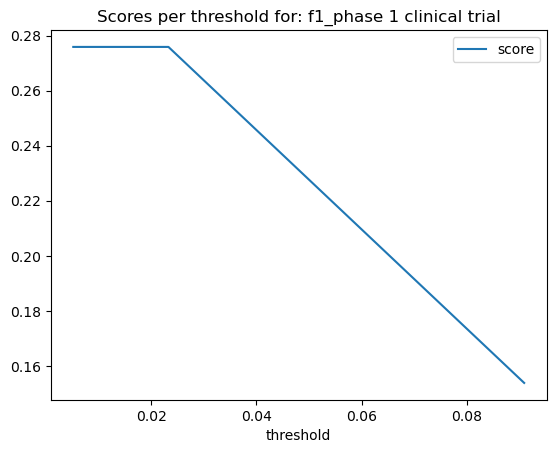

       index                               label_threshold     score                      label  threshold
18011    251  f1_phase 2 clinical trial-0.0051546391752577  0.521739  f1_phase 2 clinical trial   0.005155
18027    247  f1_phase 2 clinical trial-0.0052083333333333  0.500000  f1_phase 2 clinical trial   0.005208
18046    246  f1_phase 2 clinical trial-0.0054054054054054  0.507463  f1_phase 2 clinical trial   0.005405
18075    255  f1_phase 2 clinical trial-0.0056179775280898  0.500000  f1_phase 2 clinical trial   0.005618
18092    252  f1_phase 2 clinical trial-0.0063694267515923  0.500000  f1_phase 2 clinical trial   0.006369
18119    259  f1_phase 2 clinical trial-0.0069930069930069  0.492754  f1_phase 2 clinical trial   0.006993
18124    227  f1_phase 2 clinical trial-0.0075187969924812  0.507463  f1_phase 2 clinical trial   0.007519
18154    254  f1_phase 2 clinical trial-0.0076335877862595  0.507463  f1_phase 2 clinical trial   0.007634
18177    257   f1_phase 2 clinical tr

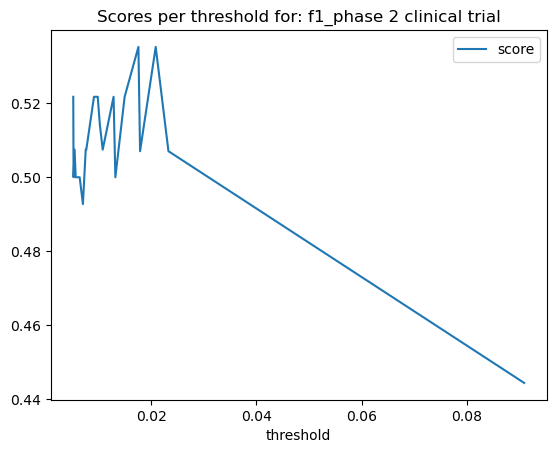

       index                               label_threshold     score                      label  threshold
19611    251  f1_phase 3 clinical trial-0.0051546391752577  0.216216  f1_phase 3 clinical trial   0.005155
19627    247  f1_phase 3 clinical trial-0.0052083333333333  0.216216  f1_phase 3 clinical trial   0.005208
19646    246  f1_phase 3 clinical trial-0.0054054054054054  0.216216  f1_phase 3 clinical trial   0.005405
19675    255  f1_phase 3 clinical trial-0.0056179775280898  0.216216  f1_phase 3 clinical trial   0.005618
19692    252  f1_phase 3 clinical trial-0.0063694267515923  0.216216  f1_phase 3 clinical trial   0.006369
19719    259  f1_phase 3 clinical trial-0.0069930069930069  0.216216  f1_phase 3 clinical trial   0.006993
19724    227  f1_phase 3 clinical trial-0.0075187969924812  0.216216  f1_phase 3 clinical trial   0.007519
19754    254  f1_phase 3 clinical trial-0.0076335877862595  0.216216  f1_phase 3 clinical trial   0.007634
19777    257   f1_phase 3 clinical tr

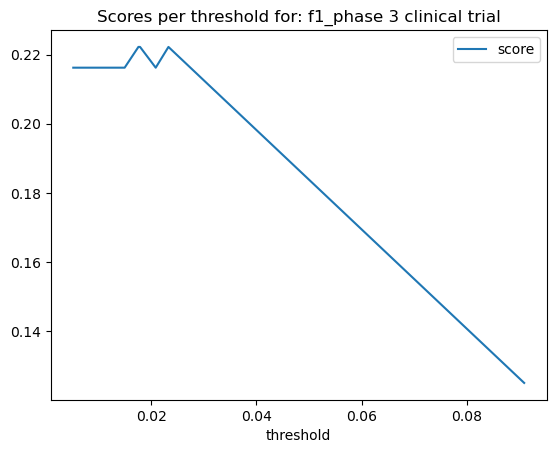

       index                               label_threshold  score                      label  threshold
20411    251  f1_phase 4 clinical trial-0.0051546391752577    0.0  f1_phase 4 clinical trial   0.005155
20427    247  f1_phase 4 clinical trial-0.0052083333333333    0.0  f1_phase 4 clinical trial   0.005208
20446    246  f1_phase 4 clinical trial-0.0054054054054054    0.0  f1_phase 4 clinical trial   0.005405
20475    255  f1_phase 4 clinical trial-0.0056179775280898    0.0  f1_phase 4 clinical trial   0.005618
20492    252  f1_phase 4 clinical trial-0.0063694267515923    0.0  f1_phase 4 clinical trial   0.006369
20519    259  f1_phase 4 clinical trial-0.0069930069930069    0.0  f1_phase 4 clinical trial   0.006993
20524    227  f1_phase 4 clinical trial-0.0075187969924812    0.0  f1_phase 4 clinical trial   0.007519
20554    254  f1_phase 4 clinical trial-0.0076335877862595    0.0  f1_phase 4 clinical trial   0.007634
20577    257   f1_phase 4 clinical trial-0.009090909090909    0.

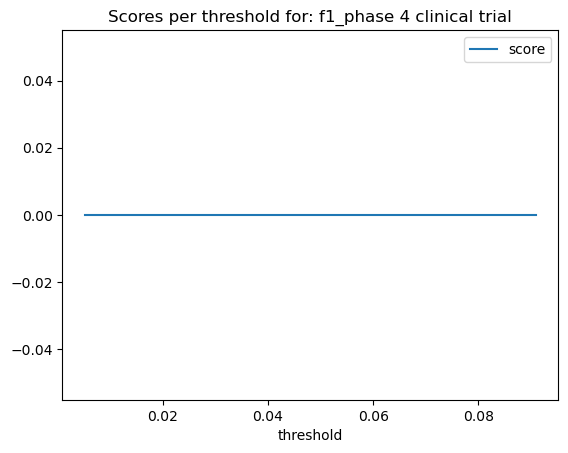

      index                    label_threshold     score           label  threshold
6411    251  f1_pilot study-0.0051546391752577  0.679688  f1_pilot study   0.005155
6427    247  f1_pilot study-0.0052083333333333  0.671875  f1_pilot study   0.005208
6446    246  f1_pilot study-0.0054054054054054  0.671875  f1_pilot study   0.005405
6475    255  f1_pilot study-0.0056179775280898  0.671875  f1_pilot study   0.005618
6492    252  f1_pilot study-0.0063694267515923  0.671875  f1_pilot study   0.006369
6519    259  f1_pilot study-0.0069930069930069  0.671875  f1_pilot study   0.006993
6524    227  f1_pilot study-0.0075187969924812  0.671875  f1_pilot study   0.007519
6554    254  f1_pilot study-0.0076335877862595  0.671875  f1_pilot study   0.007634
6577    257   f1_pilot study-0.009090909090909  0.679688  f1_pilot study   0.009091
6588    248  f1_pilot study-0.0098039215686274  0.677165  f1_pilot study   0.009804
6616    256   f1_pilot study-0.010204081632653  0.674510  f1_pilot study   0

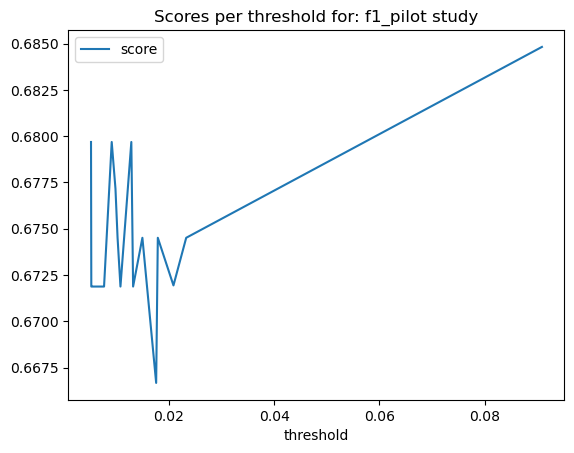

       index                        label_threshold     score               label  threshold
14411    251  f1_preschool child-0.0051546391752577  0.169014  f1_preschool child   0.005155
14427    247  f1_preschool child-0.0052083333333333  0.155340  f1_preschool child   0.005208
14446    246  f1_preschool child-0.0054054054054054  0.154589  f1_preschool child   0.005405
14475    255  f1_preschool child-0.0056179775280898  0.155340  f1_preschool child   0.005618
14492    252  f1_preschool child-0.0063694267515923  0.156098  f1_preschool child   0.006369
14519    259  f1_preschool child-0.0069930069930069  0.169811  f1_preschool child   0.006993
14524    227  f1_preschool child-0.0075187969924812  0.154589  f1_preschool child   0.007519
14554    254  f1_preschool child-0.0076335877862595  0.156098  f1_preschool child   0.007634
14577    257   f1_preschool child-0.009090909090909  0.168224  f1_preschool child   0.009091
14588    248  f1_preschool child-0.0098039215686274  0.169014  f1_pres

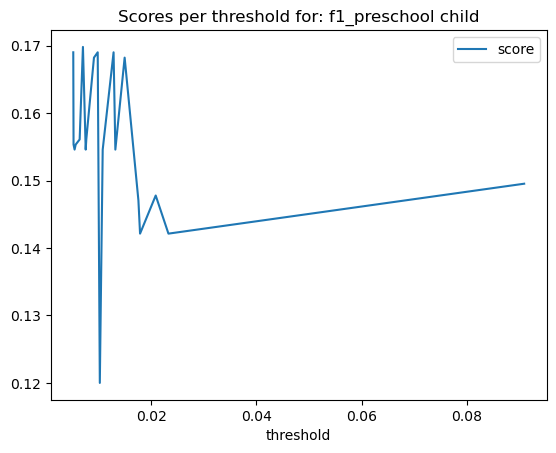

       index                                    label_threshold     score                           label  threshold
18411    251  f1_randomized controlled trial-0.0051546391752577  0.804438  f1_randomized controlled trial   0.005155
18427    247  f1_randomized controlled trial-0.0052083333333333  0.804408  f1_randomized controlled trial   0.005208
18446    246  f1_randomized controlled trial-0.0054054054054054  0.804408  f1_randomized controlled trial   0.005405
18475    255  f1_randomized controlled trial-0.0056179775280898  0.803301  f1_randomized controlled trial   0.005618
18492    252  f1_randomized controlled trial-0.0063694267515923  0.802759  f1_randomized controlled trial   0.006369
18519    259  f1_randomized controlled trial-0.0069930069930069  0.806584  f1_randomized controlled trial   0.006993
18524    227  f1_randomized controlled trial-0.0075187969924812  0.804408  f1_randomized controlled trial   0.007519
18554    254  f1_randomized controlled trial-0.0076335877862595 

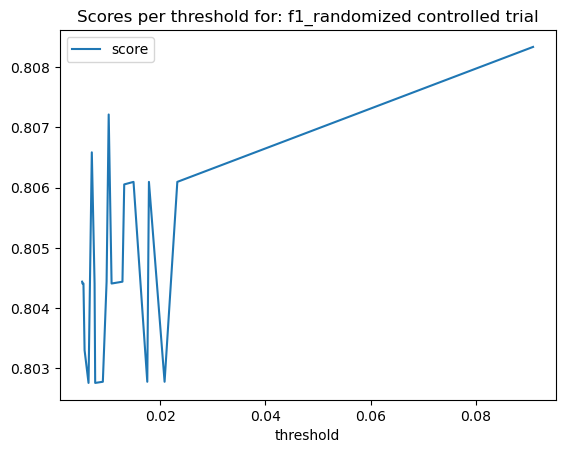

      index            label_threshold     score   label  threshold
811     251  f1_rat-0.0051546391752577  0.882040  f1_rat   0.005155
827     247  f1_rat-0.0052083333333333  0.882040  f1_rat   0.005208
846     246  f1_rat-0.0054054054054054  0.882040  f1_rat   0.005405
875     255  f1_rat-0.0056179775280898  0.882040  f1_rat   0.005618
892     252  f1_rat-0.0063694267515923  0.882040  f1_rat   0.006369
919     259  f1_rat-0.0069930069930069  0.882291  f1_rat   0.006993
924     227  f1_rat-0.0075187969924812  0.882040  f1_rat   0.007519
954     254  f1_rat-0.0076335877862595  0.882040  f1_rat   0.007634
977     257   f1_rat-0.009090909090909  0.882040  f1_rat   0.009091
988     248  f1_rat-0.0098039215686274  0.882040  f1_rat   0.009804
1016    256   f1_rat-0.010204081632653  0.886994  f1_rat   0.010204
1022    225   f1_rat-0.010752688172043  0.882040  f1_rat   0.010753
1043    226  f1_rat-0.0128205128205128  0.881104  f1_rat   0.012821
1078    258  f1_rat-0.0131578947368421  0.882040

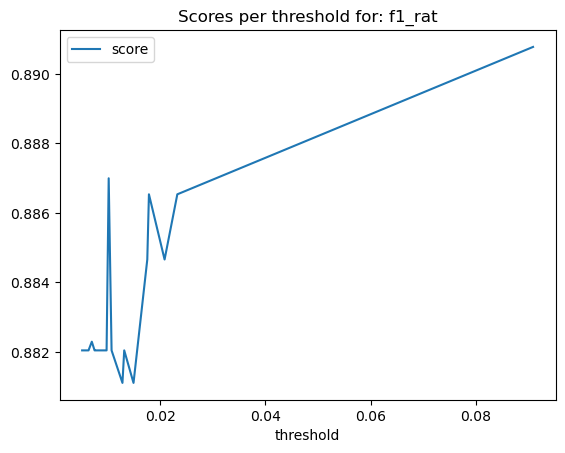

      index                            label_threshold     score                   label  threshold
7211    251  f1_retrospective study-0.0051546391752577  0.808480  f1_retrospective study   0.005155
7227    247  f1_retrospective study-0.0052083333333333  0.805776  f1_retrospective study   0.005208
7246    246  f1_retrospective study-0.0054054054054054  0.806056  f1_retrospective study   0.005405
7275    255  f1_retrospective study-0.0056179775280898  0.805916  f1_retrospective study   0.005618
7292    252  f1_retrospective study-0.0063694267515923  0.806207  f1_retrospective study   0.006369
7319    259  f1_retrospective study-0.0069930069930069  0.807068  f1_retrospective study   0.006993
7324    227  f1_retrospective study-0.0075187969924812  0.805626  f1_retrospective study   0.007519
7354    254  f1_retrospective study-0.0076335877862595  0.806207  f1_retrospective study   0.007634
7377    257   f1_retrospective study-0.009090909090909  0.809061  f1_retrospective study   0.009091


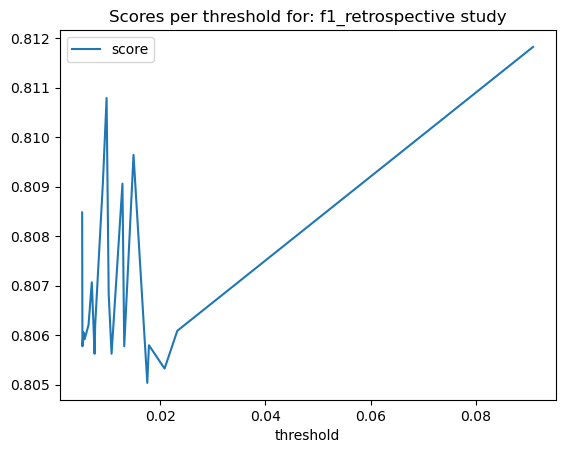

       index                     label_threshold     score            label  threshold
13611    251  f1_school child-0.0051546391752577  0.179104  f1_school child   0.005155
13627    247  f1_school child-0.0052083333333333  0.166038  f1_school child   0.005208
13646    246  f1_school child-0.0054054054054054  0.166038  f1_school child   0.005405
13675    255  f1_school child-0.0056179775280898  0.166038  f1_school child   0.005618
13692    252  f1_school child-0.0063694267515923  0.159091  f1_school child   0.006369
13719    259  f1_school child-0.0069930069930069  0.185874  f1_school child   0.006993
13724    227  f1_school child-0.0075187969924812  0.166038  f1_school child   0.007519
13754    254  f1_school child-0.0076335877862595  0.159091  f1_school child   0.007634
13777    257   f1_school child-0.009090909090909  0.185874  f1_school child   0.009091
13788    248  f1_school child-0.0098039215686274  0.185185  f1_school child   0.009804
13816    256   f1_school child-0.0102040816

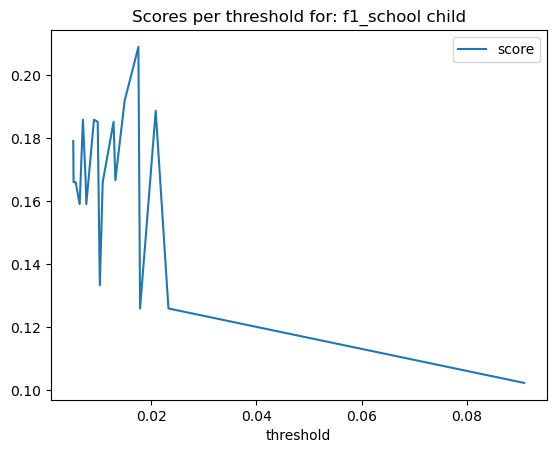

       index                               label_threshold  score                      label  threshold
10011    251  f1_single blind procedure-0.0051546391752577    0.0  f1_single blind procedure   0.005155
10027    247  f1_single blind procedure-0.0052083333333333    0.0  f1_single blind procedure   0.005208
10046    246  f1_single blind procedure-0.0054054054054054    0.0  f1_single blind procedure   0.005405
10075    255  f1_single blind procedure-0.0056179775280898    0.0  f1_single blind procedure   0.005618
10092    252  f1_single blind procedure-0.0063694267515923    0.0  f1_single blind procedure   0.006369
10119    259  f1_single blind procedure-0.0069930069930069    0.0  f1_single blind procedure   0.006993
10124    227  f1_single blind procedure-0.0075187969924812    0.0  f1_single blind procedure   0.007519
10154    254  f1_single blind procedure-0.0076335877862595    0.0  f1_single blind procedure   0.007634
10177    257   f1_single blind procedure-0.009090909090909    0.

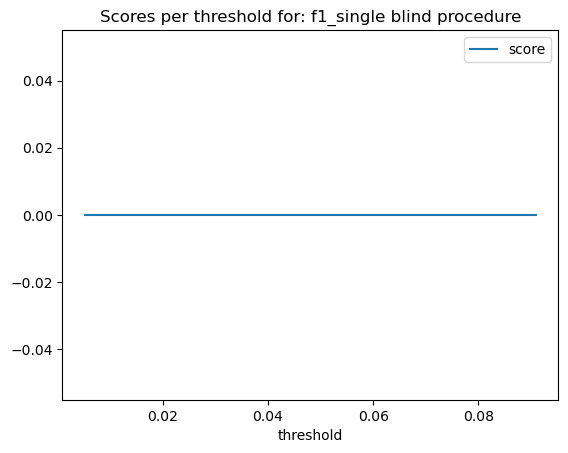

      index                          label_threshold     score                 label  threshold
5211    251  f1_systematic review-0.0051546391752577  0.796915  f1_systematic review   0.005155
5227    247  f1_systematic review-0.0052083333333333  0.801020  f1_systematic review   0.005208
5246    246  f1_systematic review-0.0054054054054054  0.801020  f1_systematic review   0.005405
5275    255  f1_systematic review-0.0056179775280898  0.803069  f1_systematic review   0.005618
5292    252  f1_systematic review-0.0063694267515923  0.801020  f1_systematic review   0.006369
5319    259  f1_systematic review-0.0069930069930069  0.800000  f1_systematic review   0.006993
5324    227  f1_systematic review-0.0075187969924812  0.801020  f1_systematic review   0.007519
5354    254  f1_systematic review-0.0076335877862595  0.801020  f1_systematic review   0.007634
5377    257   f1_systematic review-0.009090909090909  0.796915  f1_systematic review   0.009091
5388    248  f1_systematic review-0.0098

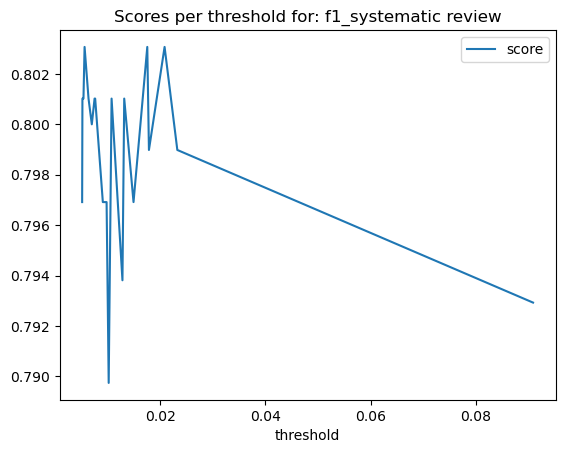

       index                     label_threshold     score            label  threshold
12811    251  f1_very elderly-0.0051546391752577  0.088643  f1_very elderly   0.005155
12827    247  f1_very elderly-0.0052083333333333  0.056818  f1_very elderly   0.005208
12846    246  f1_very elderly-0.0054054054054054  0.056818  f1_very elderly   0.005405
12875    255  f1_very elderly-0.0056179775280898  0.056818  f1_very elderly   0.005618
12892    252  f1_very elderly-0.0063694267515923  0.056818  f1_very elderly   0.006369
12919    259  f1_very elderly-0.0069930069930069  0.067797  f1_very elderly   0.006993
12924    227  f1_very elderly-0.0075187969924812  0.056818  f1_very elderly   0.007519
12954    254  f1_very elderly-0.0076335877862595  0.056818  f1_very elderly   0.007634
12977    257   f1_very elderly-0.009090909090909  0.088643  f1_very elderly   0.009091
12988    248  f1_very elderly-0.0098039215686274  0.093664  f1_very elderly   0.009804
13016    256   f1_very elderly-0.0102040816

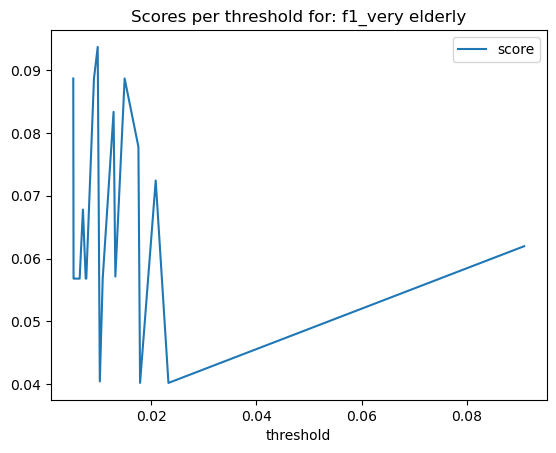

       index                    label_threshold     score           label  threshold
12411    251  f1_young adult-0.0051546391752577  0.152466  f1_young adult   0.005155
12427    247  f1_young adult-0.0052083333333333  0.153132  f1_young adult   0.005208
12446    246  f1_young adult-0.0054054054054054  0.148492  f1_young adult   0.005405
12475    255  f1_young adult-0.0056179775280898  0.153132  f1_young adult   0.005618
12492    252  f1_young adult-0.0063694267515923  0.148492  f1_young adult   0.006369
12519    259  f1_young adult-0.0069930069930069  0.151030  f1_young adult   0.006993
12524    227  f1_young adult-0.0075187969924812  0.148492  f1_young adult   0.007519
12554    254  f1_young adult-0.0076335877862595  0.148492  f1_young adult   0.007634
12577    257   f1_young adult-0.009090909090909  0.144144  f1_young adult   0.009091
12588    248  f1_young adult-0.0098039215686274  0.140590  f1_young adult   0.009804
12616    256   f1_young adult-0.010204081632653  0.125000  f1_you

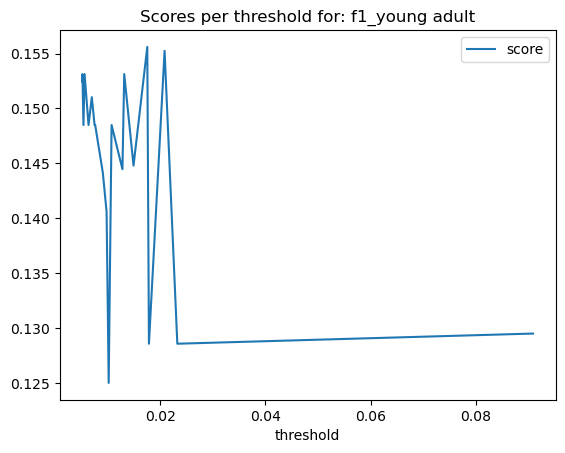

       index                               label_threshold     score                      label  threshold
11       251                   f1_human-0.0051546391752577  0.966207                   f1_human   0.005155
27       247                   f1_human-0.0052083333333333  0.965404                   f1_human   0.005208
46       246                   f1_human-0.0054054054054054  0.965526                   f1_human   0.005405
75       255                   f1_human-0.0056179775280898  0.965467                   f1_human   0.005618
92       252                   f1_human-0.0063694267515923  0.965589                   f1_human   0.006369
...      ...                                           ...       ...                        ...        ...
20709    249  f1_phase 4 clinical trial-0.0175438596491228  0.000000  f1_phase 4 clinical trial   0.017544
20720    223  f1_phase 4 clinical trial-0.0178571428571428  0.000000  f1_phase 4 clinical trial   0.017857
20750    250  f1_phase 4 clinical tri

In [40]:
visualize_individual_label_performance(model_results_df)

In [37]:
model_results_df.loc[(model_results_df['gnn_type'] == 'GAT') & \
                     (model_results_df['num_conv_layers'] == 1) & \
                     (model_results_df['embedding_size'] == 256) & \
                     (model_results_df['graph_num_epochs'] > 500) & \
                     (model_results_df['heads'] == 4), :].dropna(subset=['f1_fetus'])

,date,id,gnn_type,graph_train_f1_score_macro,graph_train_precision_macro,graph_train_recall_macro,graph_train_f1_score_micro,graph_train_precision_micro,graph_train_recall_micro,graph_test_f1_score_macro,graph_test_precision_macro,graph_test_recall_macro,graph_test_f1_score_micro,graph_test_precision_micro,graph_test_recall_micro,lgbm_train_f1_score_macro,lgbm_train_precision_macro,lgbm_train_recall_macro,lgbm_train_f1_score_micro,lgbm_train_precision_micro,lgbm_train_recall_micro,lgbm_test_f1_score_macro,lgbm_test_precision_macro,lgbm_test_recall_macro,lgbm_test_f1_score_micro,lgbm_test_precision_micro,lgbm_test_recall_micro,num_samples,embedding_type,pretrain_epochs,graph_num_epochs,layers,heads,emb_size,hidden_channels,lgbm_params,graph_val_f1_score_macro,graph_val_precision_macro,graph_val_recall_macro,graph_val_f1_score_micro,graph_val_precision_micro,graph_val_recall_micro,lgbm_val_f1_score_macro,lgbm_val_precision_macro,lgbm_val_recall_macro,lgbm_val_f1_score_micro,lgbm_val_precision_micro,lgbm_val_recall_micro,pretrain_lr,pretrain_weight_decay,pretrain_optimizer,pretrain_loss,graph_optimizer,graph_lr,graph_weight_decay,graph_loss,graph_fl_gamma,graph_fl_alpha,edge_weight_threshold,dropout,scheduler,subsample_size,total_dataset_size,data_type_to_use,embedding_size,num_conv_layers,used_gnn,f1_m,f1_o,f1_d,f1_e,f1_l,f1__,f1_g,f1_.,f1_c,f1_s,f1_v,pr_m,pr_o,pr_d,pr_e,pr_l,pr__,pr_g,pr_.,pr_c,pr_s,pr_v,re_m,re_o,re_d,re_e,re_l,re__,re_g,re_.,re_c,re_s,re_v,f1_adolescent,f1_adult,f1_aged,f1_animal cell,f1_animal experiment,f1_animal model,f1_animal tissue,f1_case control study,f1_case report,f1_child,f1_clinical article,f1_clinical trial,f1_cohort analysis,f1_controlled clinical trial,f1_controlled study,f1_cross-sectional study,f1_crossover procedure,f1_diagnostic test accuracy study,f1_double blind procedure,f1_embryo,f1_female,f1_fetus,f1_human,f1_human cell,f1_human experiment,f1_human tissue,f1_infant,f1_longitudinal study,f1_major clinical study,f1_male,f1_meta analysis,f1_middle aged,f1_mouse,f1_multicenter study,f1_newborn,f1_nonhuman,f1_normal human,f1_observational study,f1_phase 1 clinical trial,f1_phase 2 clinical trial,f1_phase 3 clinical trial,f1_phase 4 clinical trial,f1_pilot study,f1_preschool child,f1_randomized controlled trial,f1_rat,f1_retrospective study,f1_school child,f1_single blind procedure,f1_systematic review,f1_very elderly,f1_young adult,pr_adolescent,pr_adult,pr_aged,pr_animal cell,pr_animal experiment,pr_animal model,pr_animal tissue,pr_case control study,pr_case report,pr_child,pr_clinical article,pr_clinical trial,pr_cohort analysis,pr_controlled clinical trial,pr_controlled study,pr_cross-sectional study,pr_crossover procedure,pr_diagnostic test accuracy study,pr_double blind procedure,pr_embryo,pr_female,pr_fetus,pr_human,pr_human cell,pr_human experiment,pr_human tissue,pr_infant,pr_longitudinal study,pr_major clinical study,pr_male,pr_meta analysis,pr_middle aged,pr_mouse,pr_multicenter study,pr_newborn,pr_nonhuman,pr_normal human,pr_observational study,pr_phase 1 clinical trial,pr_phase 2 clinical trial,pr_phase 3 clinical trial,pr_phase 4 clinical trial,pr_pilot study,pr_preschool child,pr_randomized controlled trial,pr_rat,pr_retrospective study,pr_school child,pr_single blind procedure,pr_systematic review,pr_very elderly,pr_young adult,re_adolescent,re_adult,re_aged,re_animal cell,re_animal experiment,re_animal model,re_animal tissue,re_case control study,re_case report,re_child,re_clinical article,re_clinical trial,re_cohort analysis,re_controlled clinical trial,re_controlled study,re_cross-sectional study,re_crossover procedure,re_diagnostic test accuracy study,re_double blind procedure,re_embryo,re_female,re_fetus,re_human,re_human cell,re_human experiment,re_human tissue,re_infant,re_longitudinal study,re_major clinical study,re_male,re_meta analysis,re_middle aged,re_mouse,re_multicenter study,re_newborn,re_nonhuman,re_normal human,re_observational study,re_phase 1 clinical tria